In [9]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "open-images-v7",
    label_types=["detections"],
    max_samples=30,
    classes=["House", "Building", "Cabinetry", "Furniture", "Desk", "Door", "Kitchen appliance"],
)

Necessary images already downloaded
Existing download of split 'train' is sufficient
Necessary images already downloaded
Existing download of split 'test' is sufficient
Necessary images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'open-images-v7-30'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [10]:
# import fiftyone as fo

# session = fo.launch_app(dataset)
# session.wait()

In [11]:
# Преобразование данных для использования в PyTorch
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

print('-------->  ', dataset.get_field_schema())


-------->   OrderedDict({'id': <fiftyone.core.fields.ObjectIdField object at 0x000002208850BBF0>, 'filepath': <fiftyone.core.fields.StringField object at 0x00000220496E1520>, 'tags': <fiftyone.core.fields.ListField object at 0x000002203CBED100>, 'metadata': <fiftyone.core.fields.EmbeddedDocumentField object at 0x0000022048E41910>, 'ground_truth': <fiftyone.core.fields.EmbeddedDocumentField object at 0x0000022048BD4F80>})


In [ ]:
# dataset.export(
#     export_dir="open_images",
#     dataset_type=fo.types.COCODetectionDataset,
#     label_field="ground_truth",
# )

 100% |███████████████████| 90/90 [3.8s elapsed, 0s remaining, 16.2 samples/s]      


In [ ]:
# dataset.export(
#     export_dir="open_images_classification",
#     dataset_type=fo.types.ImageClassificationDirectoryTree,
#     label_field="ground_truth",
# )

Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detections'>. Exporting image patches...
 100% |███████████████| 1281/1281 [52.7s elapsed, 0s remaining, 32.4 samples/s]      


In [12]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder

dataset_torch = ImageFolder(root='open_images_classification', transform=transform)
print(dataset_torch)

Dataset ImageFolder
    Number of datapoints: 1281
    Root location: open_images_classification
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [13]:
train_size = int(0.8 * len(dataset_torch))
test_size = len(dataset_torch) - train_size
train_dataset, test_dataset = random_split(dataset_torch, [train_size, test_size])

trainloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
testloader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

classes = dataset_torch.classes

In [20]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# dataset = ImageFolder(root='open_images_classification', transform=transform)
dataset = ImageFolder(root='open_images_house', transform=transform)

# train_size = int(0.8 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# trainloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
# testloader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)
train_size = int(0.8 * len(dataset))
val_size = int((len(dataset) - train_size)/2)
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

trainloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
valLoader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2)
testloader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

classes = dataset.classes

# 123
print('trainloader,', trainloader)
trainList = enumerate(trainloader, 0)
print("trainList", trainList)

trainList2 = list(trainList)
print("trainList2", trainList2)

Dataset ImageFolder
    Number of datapoints: 1281
    Root location: open_images_classification
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
trainloader, <torch.utils.data.dataloader.DataLoader object at 0x000002204AF71AF0>
trainList <enumerate object at 0x000002204AF95BC0>
trainList2 [(0, [tensor([[[[-0.4118, -0.3255, -0.2784,  ..., -0.6392, -0.7333, -0.7255],
          [-0.3333, -0.2941, -0.2627,  ..., -0.6314, -0.7412, -0.7333],
          [-0.1216, -0.1373, -0.1843,  ..., -0.6078, -0.7333, -0.7412],
          ...,
          [ 0.2000,  0.1922,  0.1765,  ..., -0.1529, -0.1529, -0.1529],
          [ 0.2314,  0.2392,  0.2235,  ..., -0.1765, -0.1608, -0.1765],
          [ 0.2392,  0.2549,  0.2627,  ..., -0.1608, -0.1608, -0.1608]],

         [[-0.3333, -0.2784, -0.2157,  ..., -0.5922, -0.6471, 

In [16]:
# 123
print('trainloader,', trainloader)
trainList = enumerate(trainloader, 0)
print("trainList", trainList)

trainList2 = list(trainList)
print("trainList2", trainList2)

trainloader, <torch.utils.data.dataloader.DataLoader object at 0x000002204A6ED100>


KeyboardInterrupt: 

In [10]:

# Определение модели CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 64)
        self.fc2 = nn.Linear(64, len(classes))  # количество выходных классов

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
net

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=98, bias=True)
)

In [11]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [1]:
# Обучение модели
print('trainloader -->', trainloader)

for epoch in range(10):  # количество эпох
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if i % 2000 == 1999:
            print(f'[Эпоха {epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Обучение завершен  ======   ??????  ')

NameError: name 'trainloader' is not defined

In [18]:
import numpy as np
import matplotlib.pyplot as plt

mean = [0.4670, 0.4735, 0.4662]
std = [0.2496, 0.2489, 0.2521]

preprocess = transforms.Compose([
    transforms.Normalize(mean=mean, std=std)
])

device = "cuda" if torch.cuda.is_available() else "cpu"

input_tensors = []

# Оценка модели и вывод изображений с предсказаниями
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


labels ---> tensor([33, 33, 77, 79])
predicted ---> tensor([95, 79,  9, 58])
total ---> 4
correct ---> 0
Истинный класс: Furniture, Предсказанный класс: Window


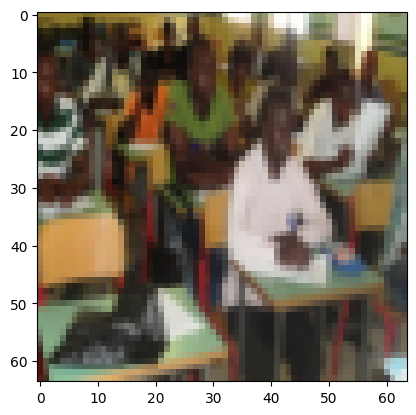

Истинный класс: Furniture, Предсказанный класс: Table


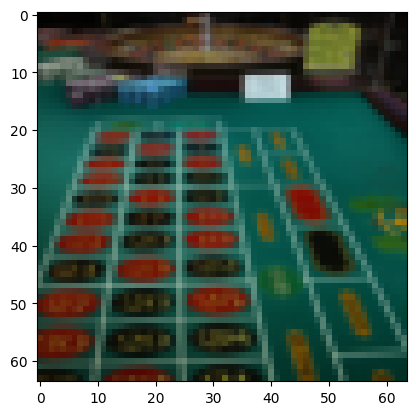

Истинный класс: Suit, Предсказанный класс: Car


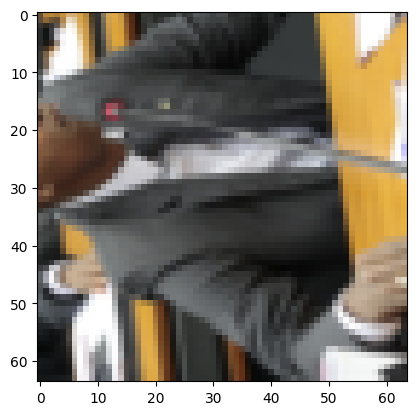

Истинный класс: Table, Предсказанный класс: Mammal


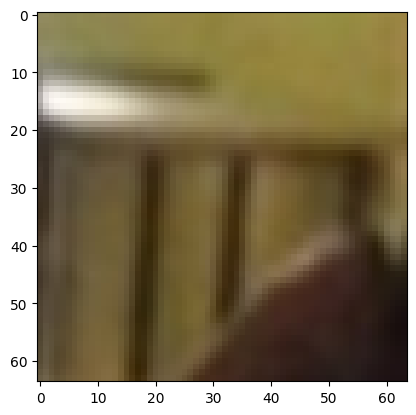

labels ---> tensor([80, 38, 59, 33])
predicted ---> tensor([38, 79, 13, 64])
total ---> 8
correct ---> 0
Истинный класс: Tableware, Предсказанный класс: House


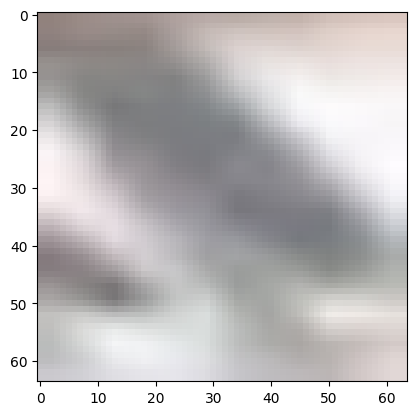

Истинный класс: House, Предсказанный класс: Table


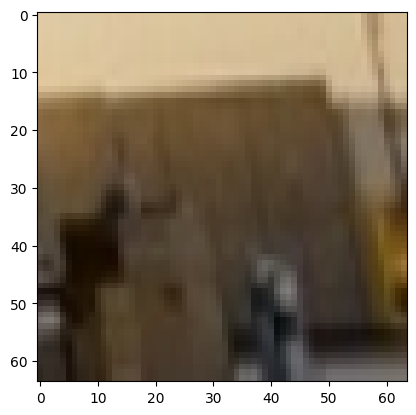

Истинный класс: Man, Предсказанный класс: Clothing


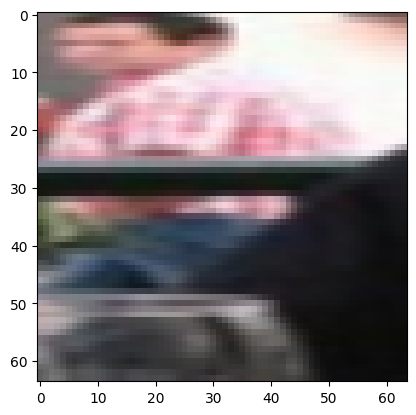

Истинный класс: Furniture, Предсказанный класс: Person


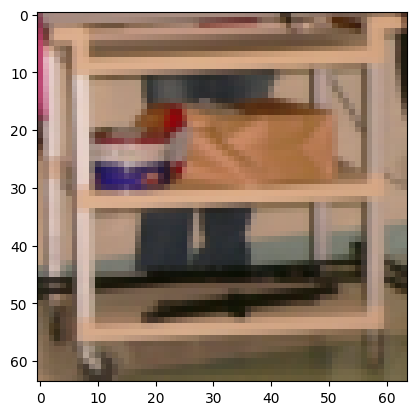

labels ---> tensor([95, 64, 38, 79])
predicted ---> tensor([95, 79, 38, 62])
total ---> 12
correct ---> 2
Истинный класс: Window, Предсказанный класс: Window


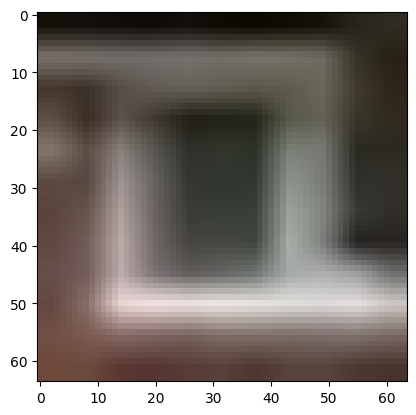

Истинный класс: Person, Предсказанный класс: Table


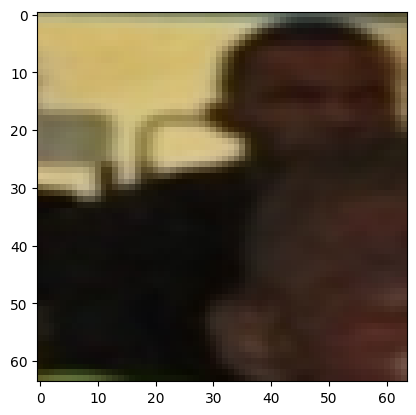

Истинный класс: House, Предсказанный класс: House


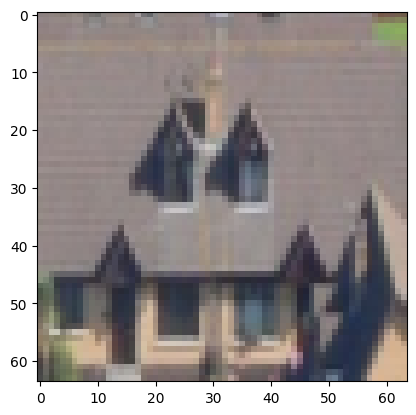

Истинный класс: Table, Предсказанный класс: Office supplies


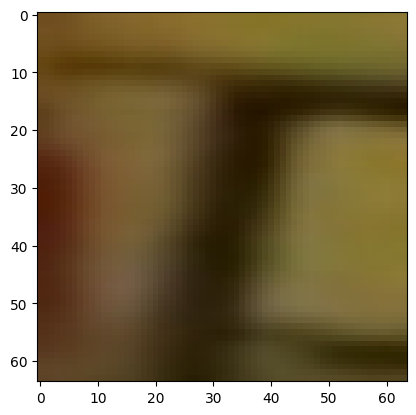

labels ---> tensor([38, 89, 64, 33])
predicted ---> tensor([13, 13, 46,  6])
total ---> 16
correct ---> 2
Истинный класс: House, Предсказанный класс: Clothing


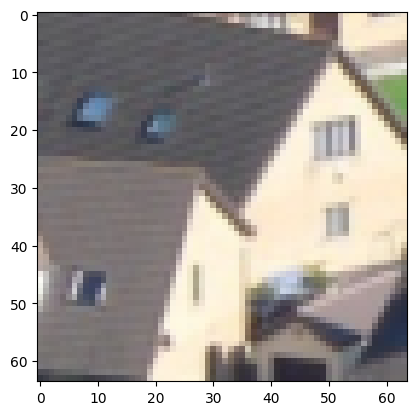

Истинный класс: Tree, Предсказанный класс: Clothing


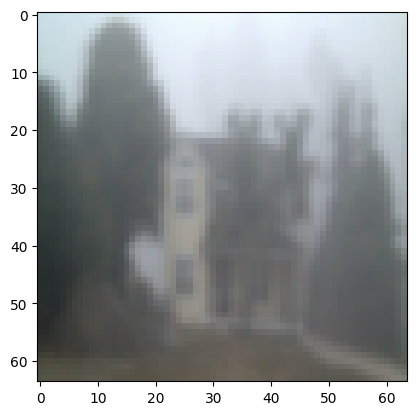

Истинный класс: Person, Предсказанный класс: Human head


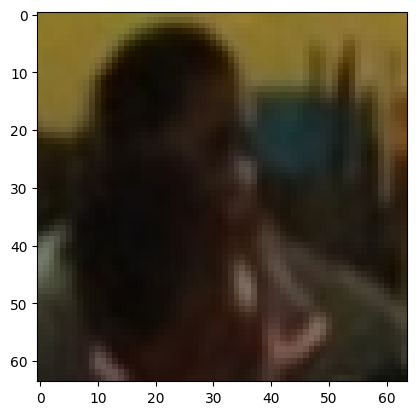

Истинный класс: Furniture, Предсказанный класс: Building


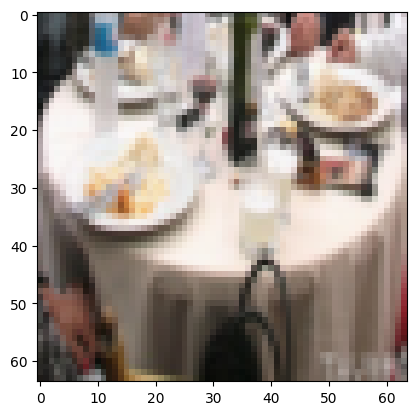

labels ---> tensor([89, 43, 95, 94])
predicted ---> tensor([33, 44, 95, 94])
total ---> 20
correct ---> 4
Истинный класс: Tree, Предсказанный класс: Furniture


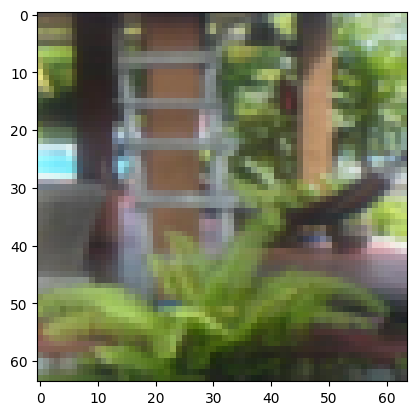

Истинный класс: Human face, Предсказанный класс: Human hair


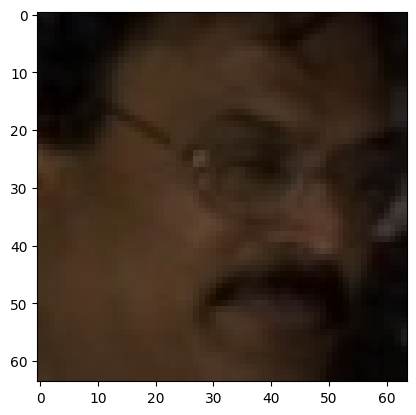

Истинный класс: Window, Предсказанный класс: Window


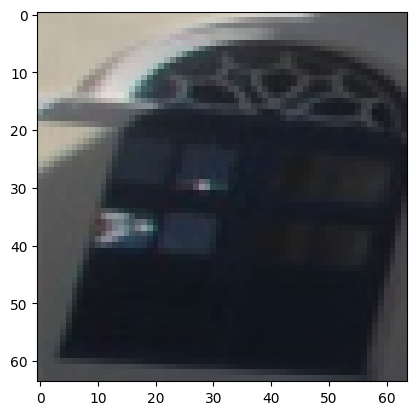

Истинный класс: Wheel, Предсказанный класс: Wheel


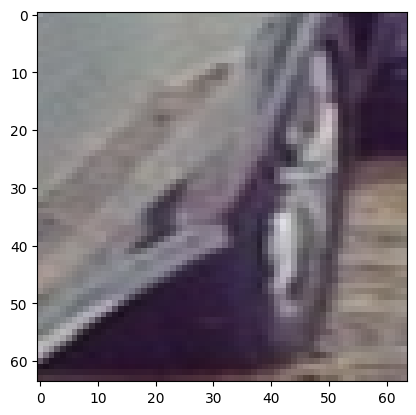

labels ---> tensor([33, 79, 47, 20])
predicted ---> tensor([13, 46, 89, 38])
total ---> 24
correct ---> 4
Истинный класс: Furniture, Предсказанный класс: Clothing


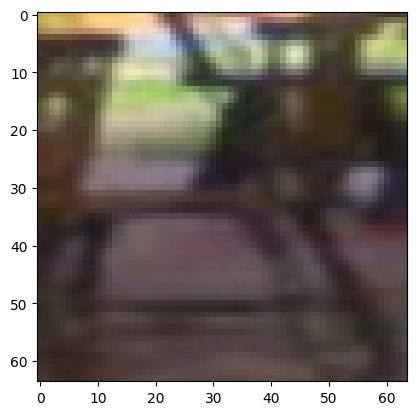

Истинный класс: Table, Предсказанный класс: Human head


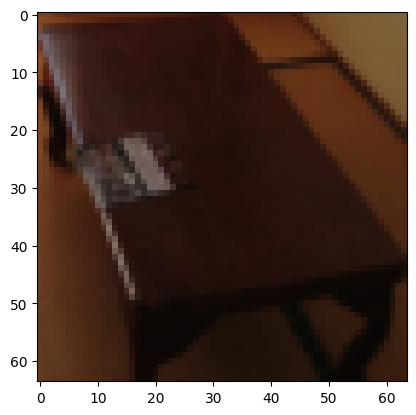

Истинный класс: Human leg, Предсказанный класс: Tree


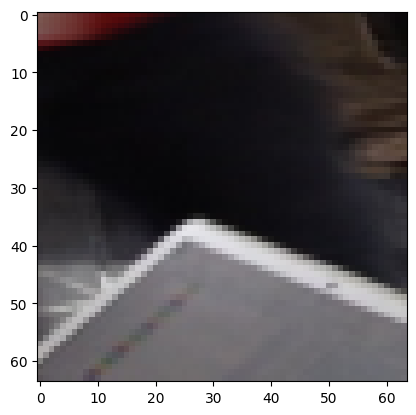

Истинный класс: Curtain, Предсказанный класс: House


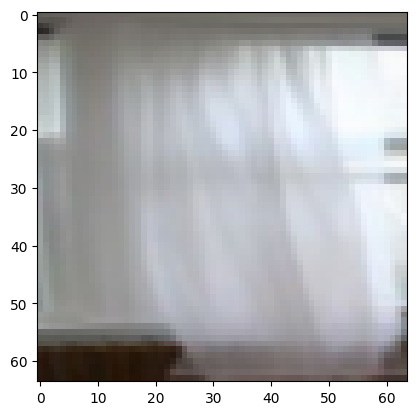

labels ---> tensor([95, 44, 95, 87])
predicted ---> tensor([95, 46, 95, 87])
total ---> 28
correct ---> 7
Истинный класс: Window, Предсказанный класс: Window


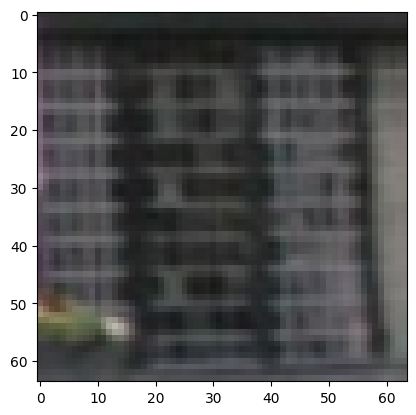

Истинный класс: Human hair, Предсказанный класс: Human head


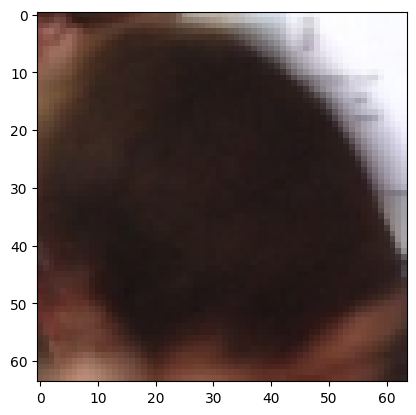

Истинный класс: Window, Предсказанный класс: Window


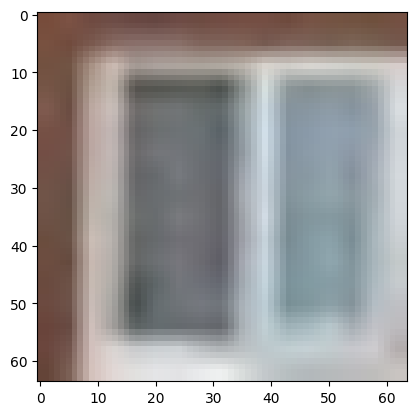

Истинный класс: Toy, Предсказанный класс: Toy


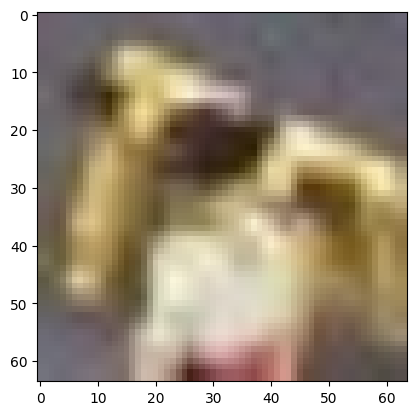

labels ---> tensor([13, 27, 87, 14])
predicted ---> tensor([64,  6, 87, 79])
total ---> 32
correct ---> 8
Истинный класс: Clothing, Предсказанный класс: Person


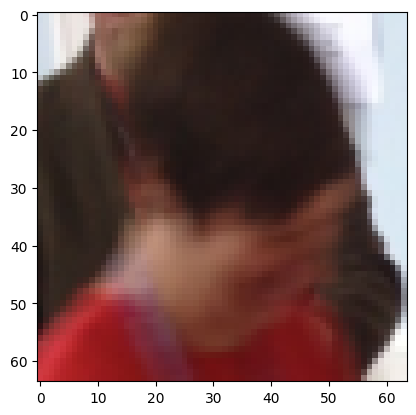

Истинный класс: Flag, Предсказанный класс: Building


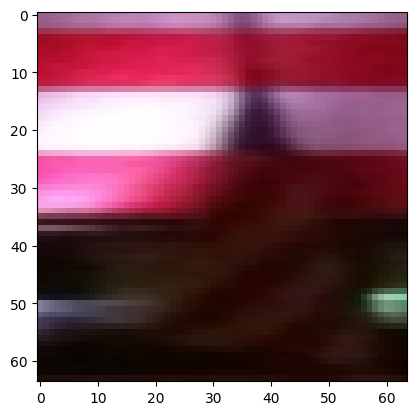

Истинный класс: Toy, Предсказанный класс: Toy


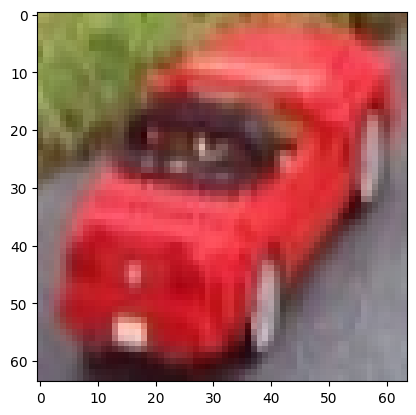

Истинный класс: Coffee table, Предсказанный класс: Table


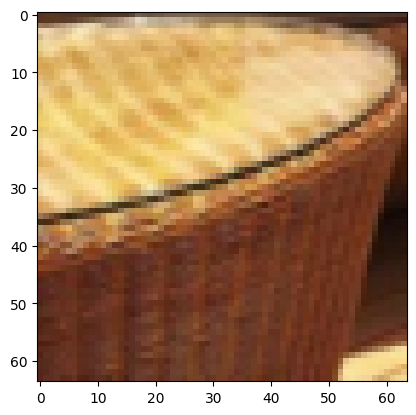

labels ---> tensor([58, 79, 37, 19])
predicted ---> tensor([46, 33, 95, 13])
total ---> 36
correct ---> 8
Истинный класс: Mammal, Предсказанный класс: Human head


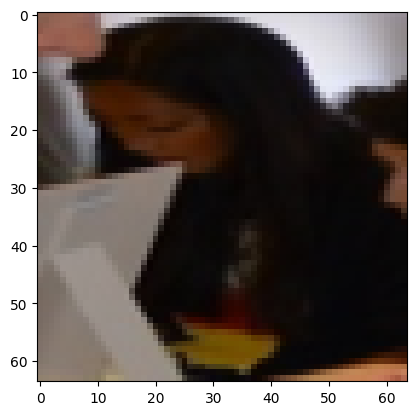

Истинный класс: Table, Предсказанный класс: Furniture


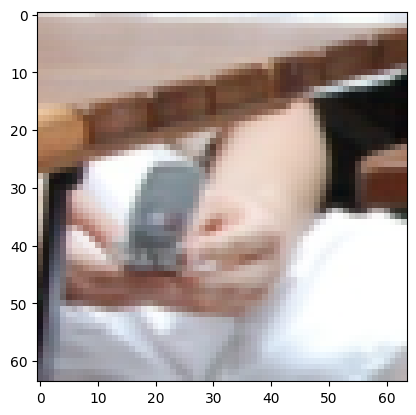

Истинный класс: Home appliance, Предсказанный класс: Window


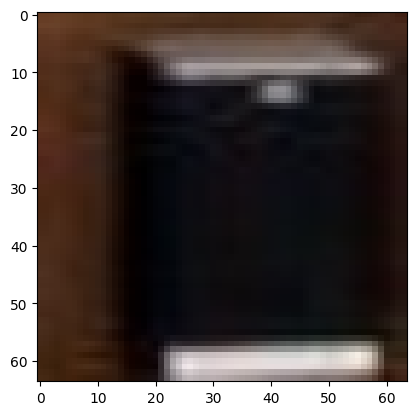

Истинный класс: Cupboard, Предсказанный класс: Clothing


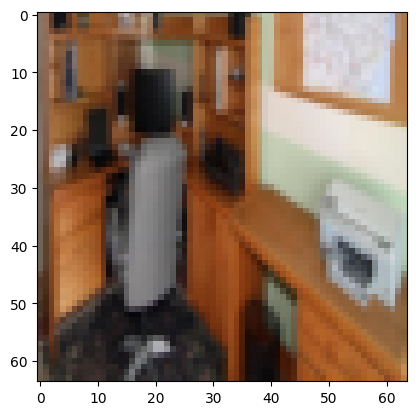

labels ---> tensor([94, 59, 57, 95])
predicted ---> tensor([33, 33, 57, 95])
total ---> 40
correct ---> 10
Истинный класс: Wheel, Предсказанный класс: Furniture


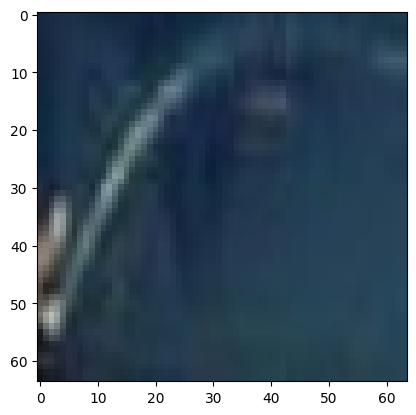

Истинный класс: Man, Предсказанный класс: Furniture


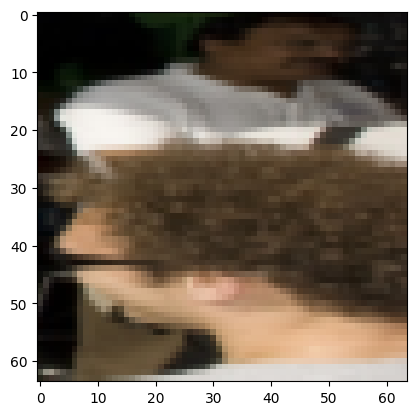

Истинный класс: Light bulb, Предсказанный класс: Light bulb


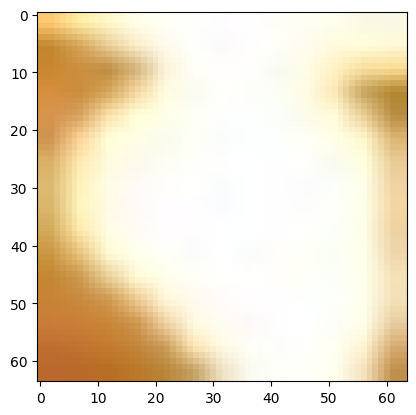

Истинный класс: Window, Предсказанный класс: Window


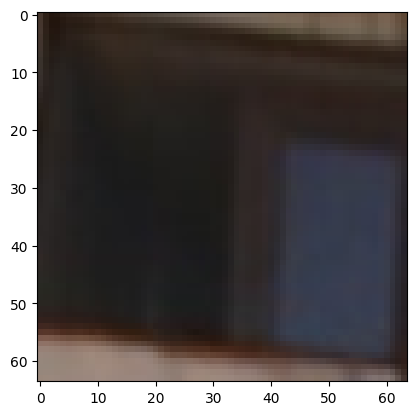

labels ---> tensor([64, 30, 94, 21])
predicted ---> tensor([64,  6, 94, 79])
total ---> 44
correct ---> 12
Истинный класс: Person, Предсказанный класс: Person


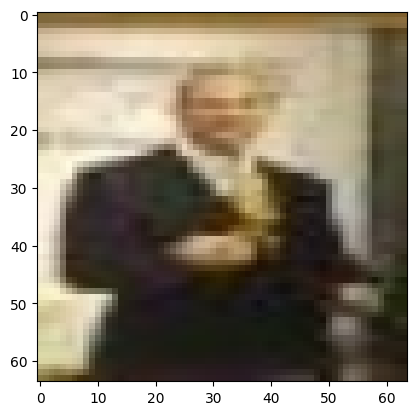

Истинный класс: Food, Предсказанный класс: Building


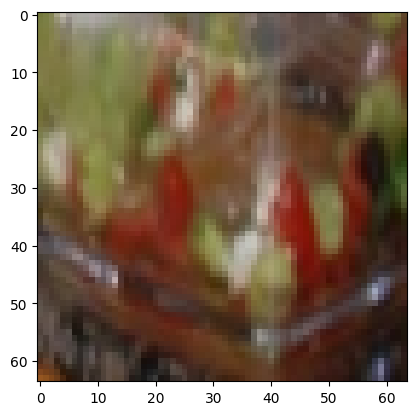

Истинный класс: Wheel, Предсказанный класс: Wheel


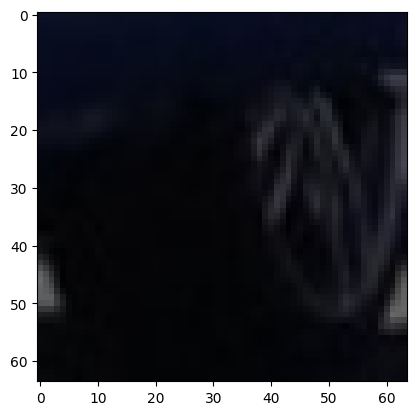

Истинный класс: Desk, Предсказанный класс: Table


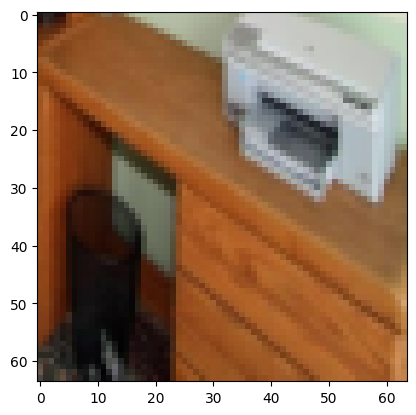

labels ---> tensor([23, 80, 76, 75])
predicted ---> tensor([38, 68, 64,  6])
total ---> 48
correct ---> 12
Истинный класс: Drawer, Предсказанный класс: House


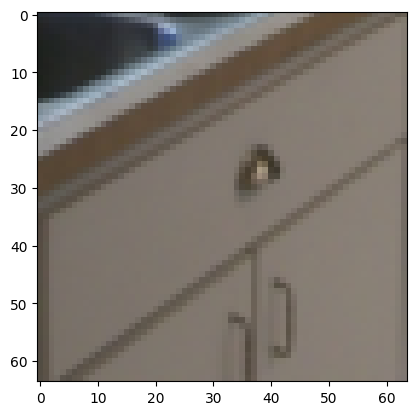

Истинный класс: Tableware, Предсказанный класс: Poster


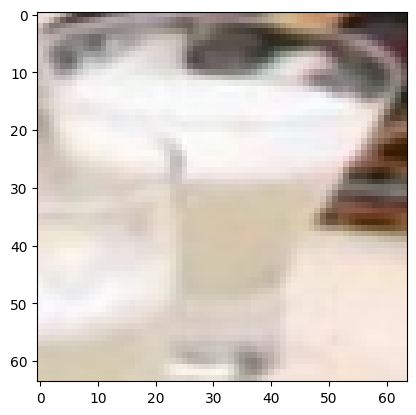

Истинный класс: Studio couch, Предсказанный класс: Person


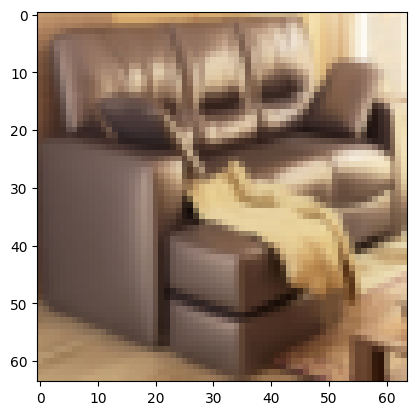

Истинный класс: Street light, Предсказанный класс: Building


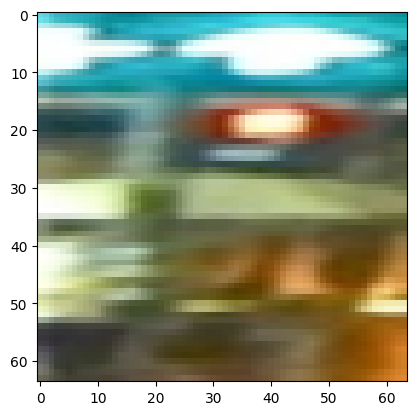

labels ---> tensor([54, 40, 12, 33])
predicted ---> tensor([38, 33, 57, 64])
total ---> 52
correct ---> 12
Истинный класс: Kitchen appliance, Предсказанный класс: House


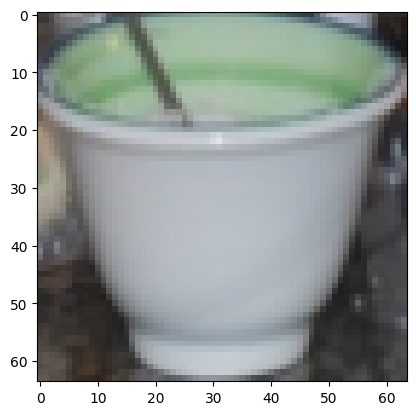

Истинный класс: Human arm, Предсказанный класс: Furniture


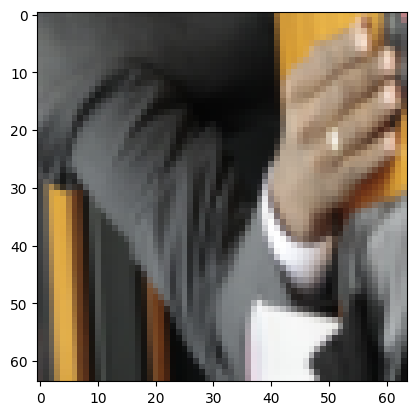

Истинный класс: Chest of drawers, Предсказанный класс: Light bulb


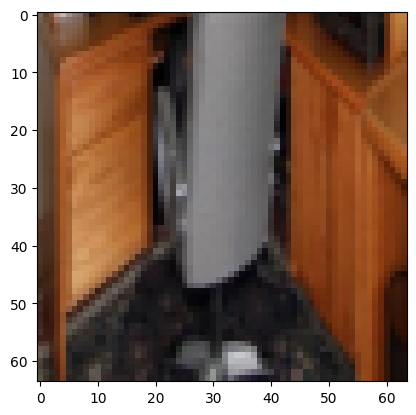

Истинный класс: Furniture, Предсказанный класс: Person


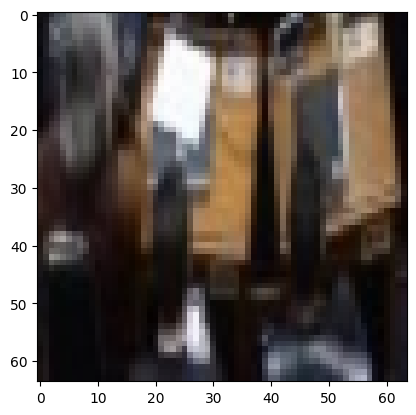

labels ---> tensor([38, 43, 62, 13])
predicted ---> tensor([95, 80, 95, 68])
total ---> 56
correct ---> 12
Истинный класс: House, Предсказанный класс: Window


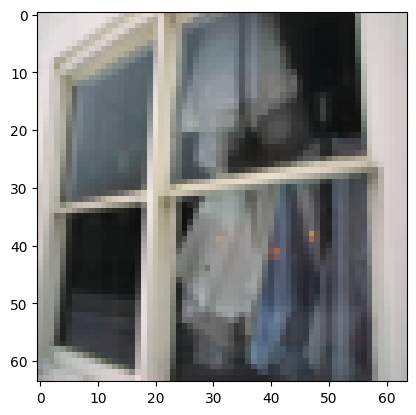

Истинный класс: Human face, Предсказанный класс: Tableware


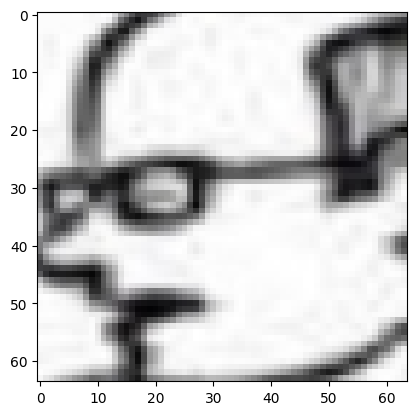

Истинный класс: Office supplies, Предсказанный класс: Window


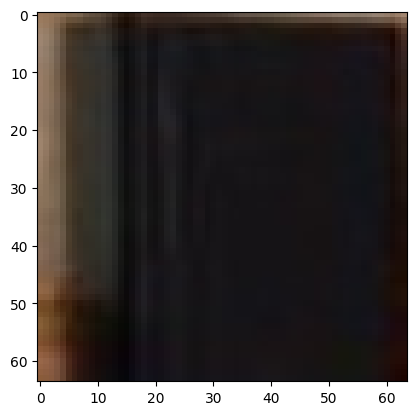

Истинный класс: Clothing, Предсказанный класс: Poster


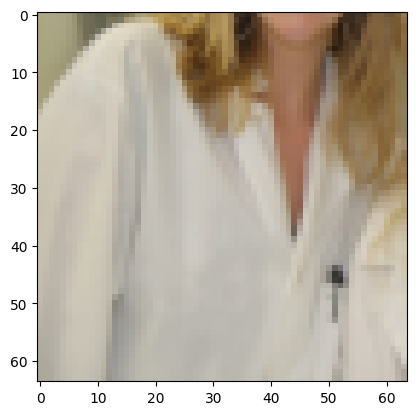

labels ---> tensor([94, 59, 95, 64])
predicted ---> tensor([33,  6, 33, 95])
total ---> 60
correct ---> 12
Истинный класс: Wheel, Предсказанный класс: Furniture


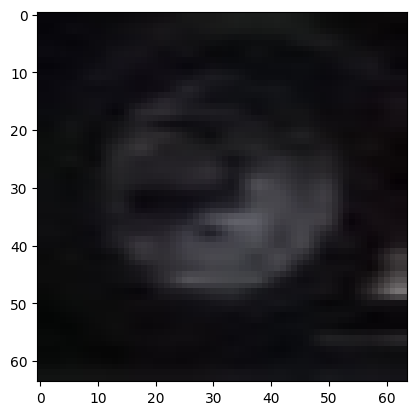

Истинный класс: Man, Предсказанный класс: Building


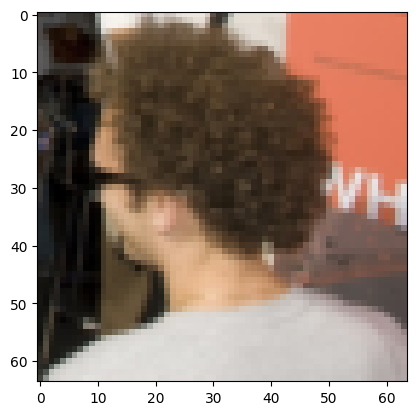

Истинный класс: Window, Предсказанный класс: Furniture


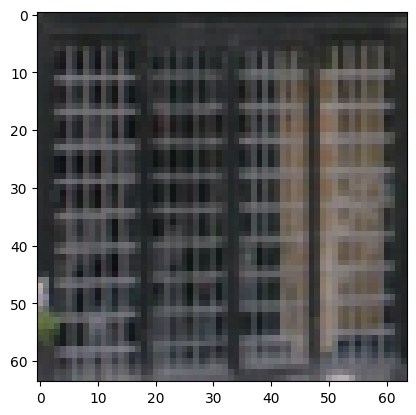

Истинный класс: Person, Предсказанный класс: Window


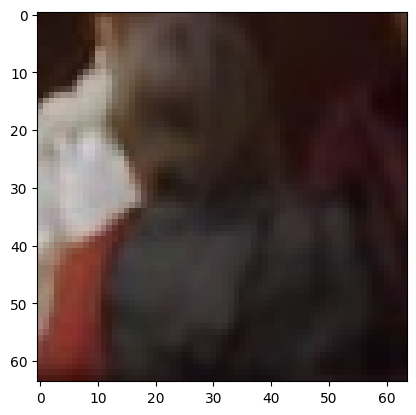

labels ---> tensor([89, 38, 89, 46])
predicted ---> tensor([33, 13, 33, 38])
total ---> 64
correct ---> 12
Истинный класс: Tree, Предсказанный класс: Furniture


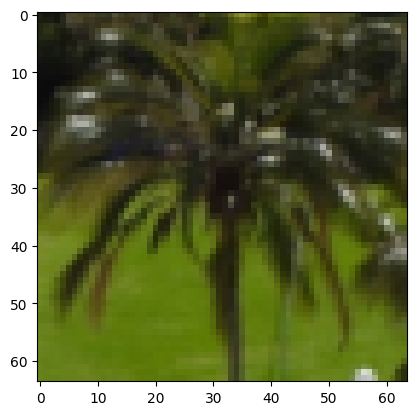

Истинный класс: House, Предсказанный класс: Clothing


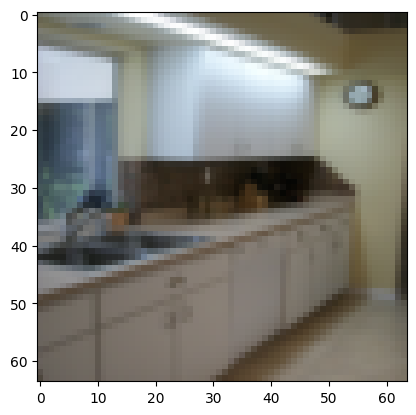

Истинный класс: Tree, Предсказанный класс: Furniture


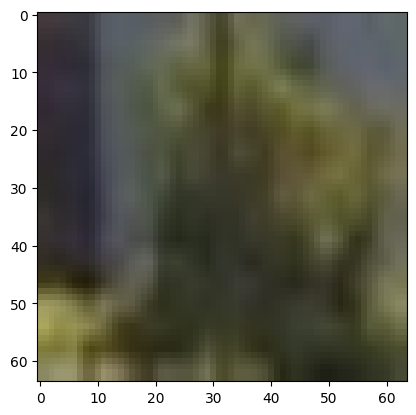

Истинный класс: Human head, Предсказанный класс: House


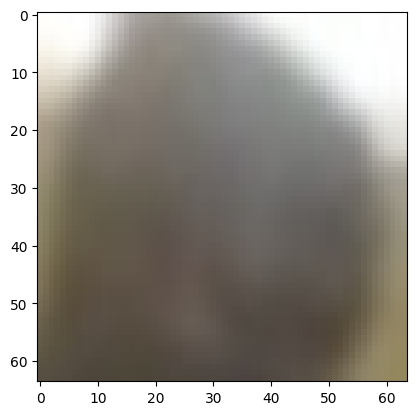

labels ---> tensor([46, 64, 31, 58])
predicted ---> tensor([44, 13, 46, 87])
total ---> 68
correct ---> 12
Истинный класс: Human head, Предсказанный класс: Human hair


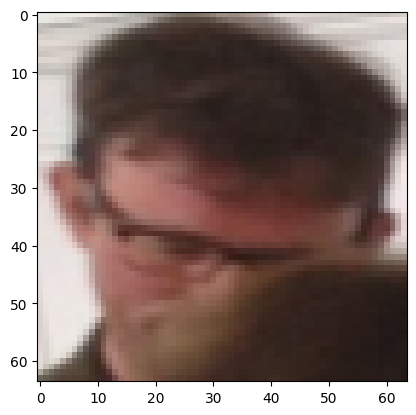

Истинный класс: Person, Предсказанный класс: Clothing


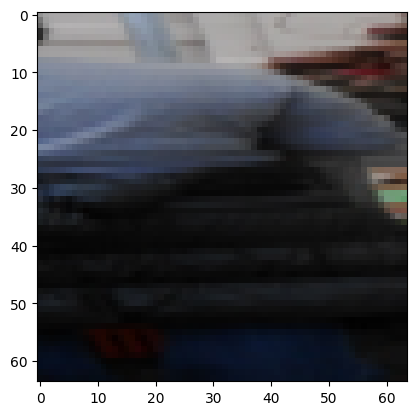

Истинный класс: Footwear, Предсказанный класс: Human head


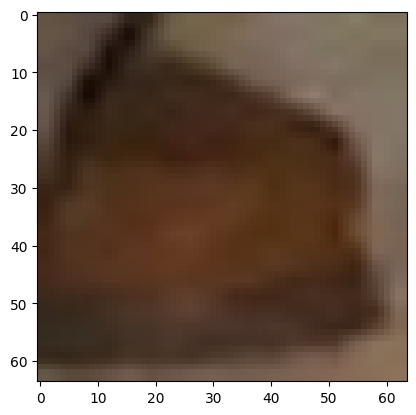

Истинный класс: Mammal, Предсказанный класс: Toy


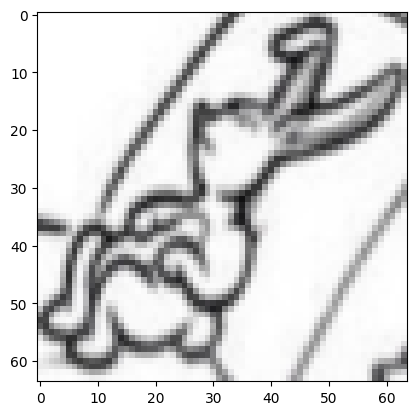

labels ---> tensor([64, 95, 13,  6])
predicted ---> tensor([37,  9, 79, 38])
total ---> 72
correct ---> 12
Истинный класс: Person, Предсказанный класс: Home appliance


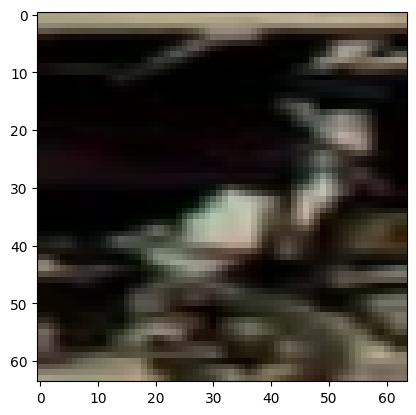

Истинный класс: Window, Предсказанный класс: Car


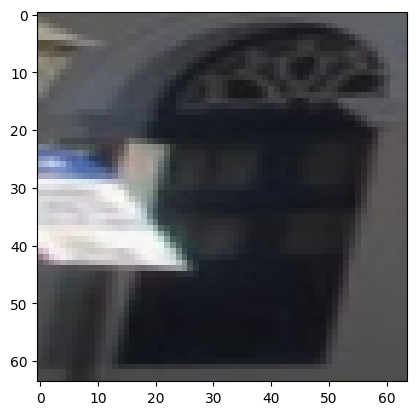

Истинный класс: Clothing, Предсказанный класс: Table


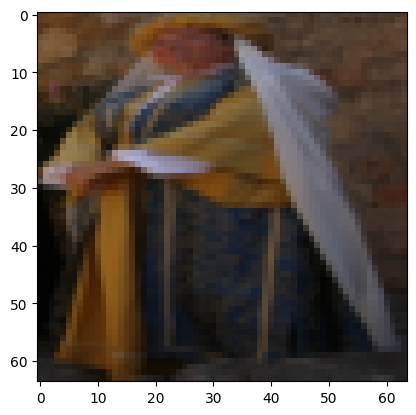

Истинный класс: Building, Предсказанный класс: House


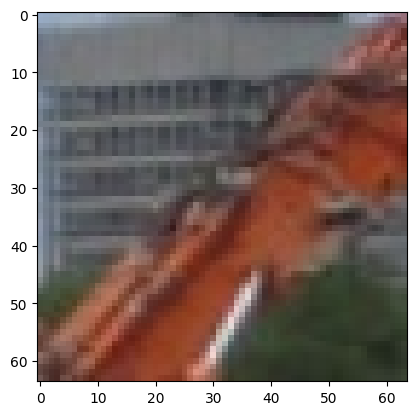

labels ---> tensor([64, 40, 18, 38])
predicted ---> tensor([79, 13, 54, 38])
total ---> 76
correct ---> 13
Истинный класс: Person, Предсказанный класс: Table


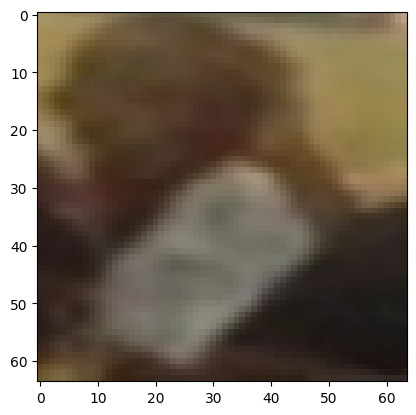

Истинный класс: Human arm, Предсказанный класс: Clothing


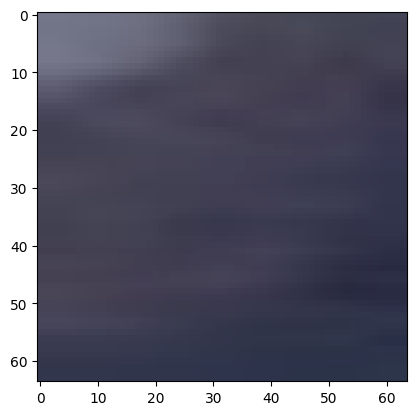

Истинный класс: Countertop, Предсказанный класс: Kitchen appliance


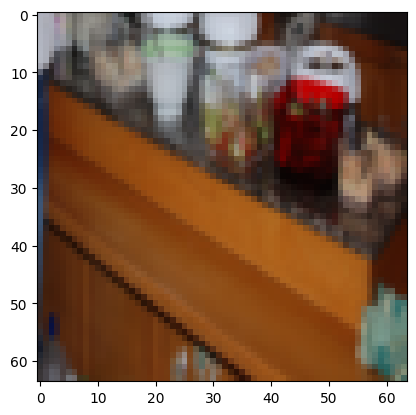

Истинный класс: House, Предсказанный класс: House


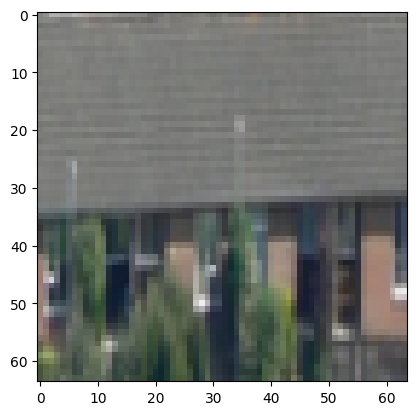

labels ---> tensor([79, 64, 21, 64])
predicted ---> tensor([13, 13, 44, 79])
total ---> 80
correct ---> 13
Истинный класс: Table, Предсказанный класс: Clothing


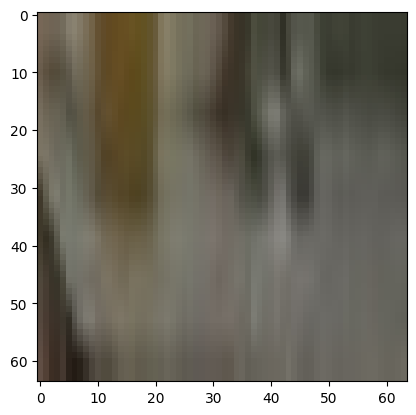

Истинный класс: Person, Предсказанный класс: Clothing


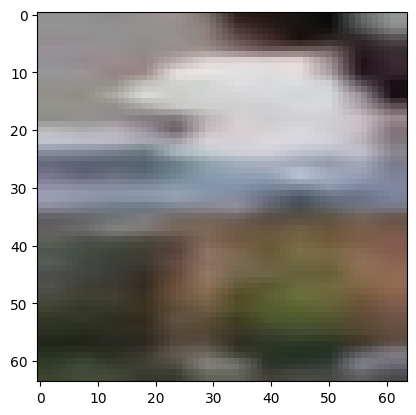

Истинный класс: Desk, Предсказанный класс: Human hair


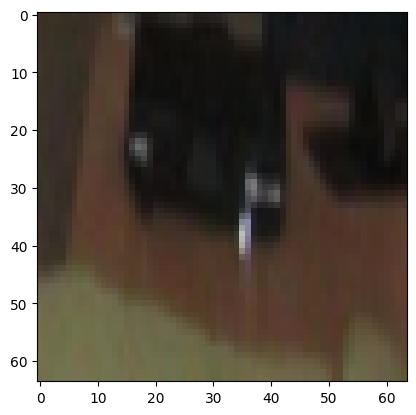

Истинный класс: Person, Предсказанный класс: Table


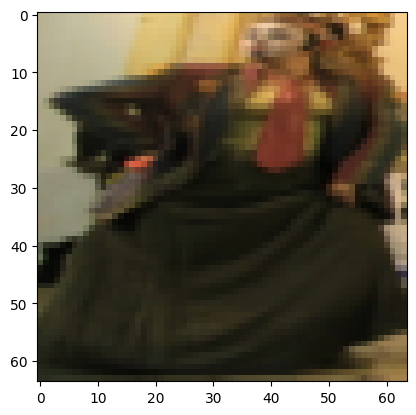

labels ---> tensor([ 6, 41, 95, 31])
predicted ---> tensor([ 6,  9, 38, 94])
total ---> 84
correct ---> 14
Истинный класс: Building, Предсказанный класс: Building


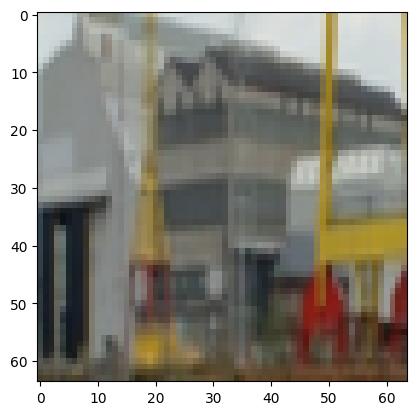

Истинный класс: Human body, Предсказанный класс: Car


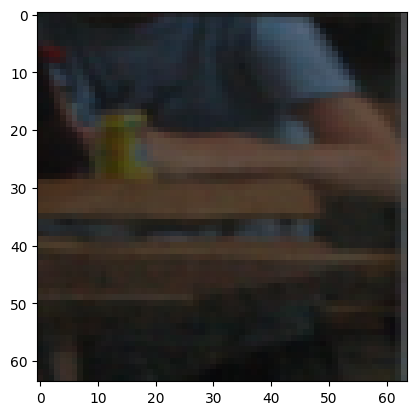

Истинный класс: Window, Предсказанный класс: House


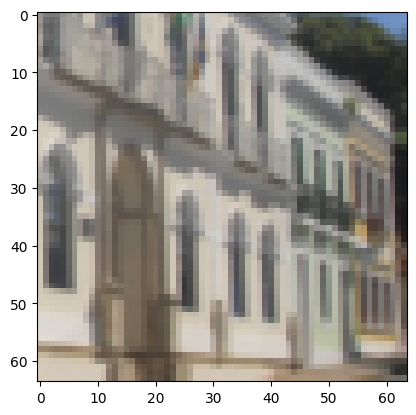

Истинный класс: Footwear, Предсказанный класс: Wheel


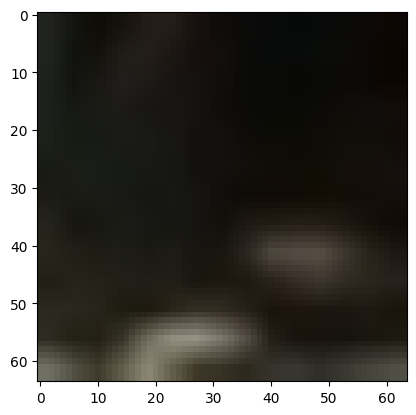

labels ---> tensor([66, 79, 64, 31])
predicted ---> tensor([33, 33, 64, 46])
total ---> 88
correct ---> 15
Истинный класс: Plant, Предсказанный класс: Furniture


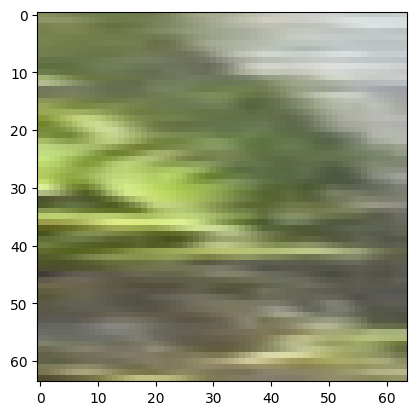

Истинный класс: Table, Предсказанный класс: Furniture


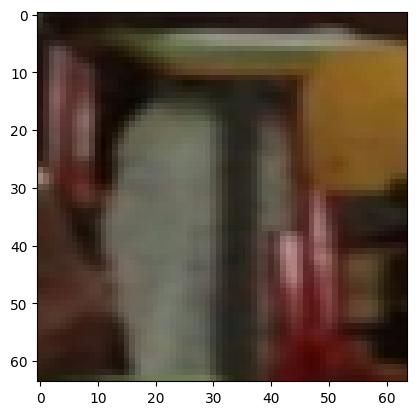

Истинный класс: Person, Предсказанный класс: Person


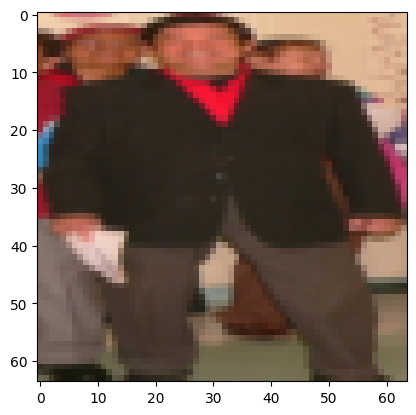

Истинный класс: Footwear, Предсказанный класс: Human head


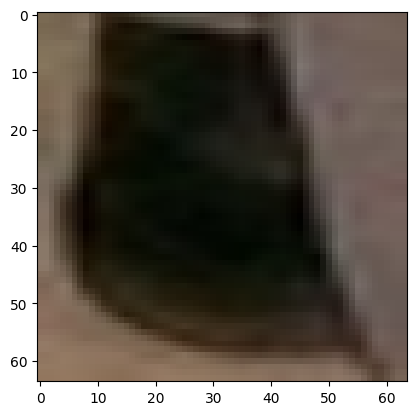

labels ---> tensor([97, 38, 71, 84])
predicted ---> tensor([64, 38, 94, 38])
total ---> 92
correct ---> 16
Истинный класс: Woman, Предсказанный класс: Person


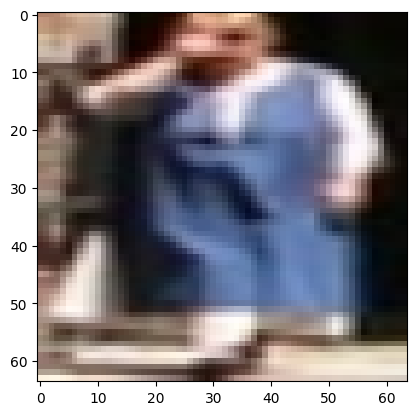

Истинный класс: House, Предсказанный класс: House


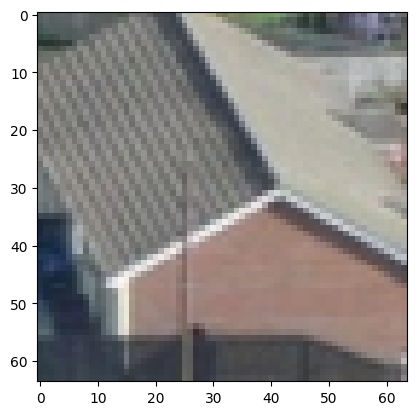

Истинный класс: Shelf, Предсказанный класс: Wheel


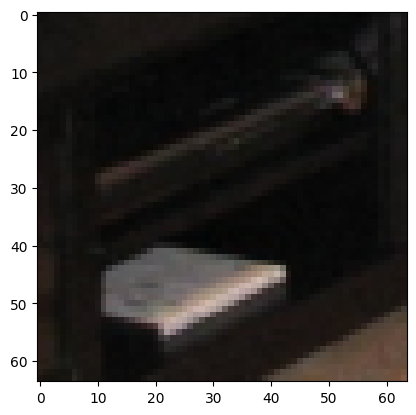

Истинный класс: Tie, Предсказанный класс: House


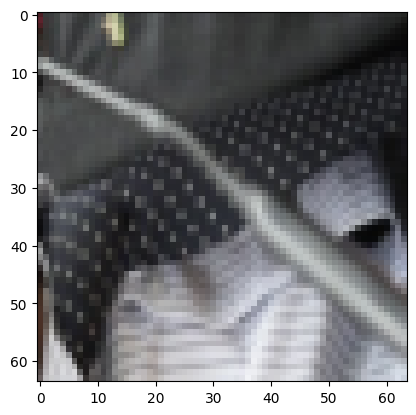

labels ---> tensor([ 6, 33, 58, 31])
predicted ---> tensor([ 6, 33, 13, 79])
total ---> 96
correct ---> 18
Истинный класс: Building, Предсказанный класс: Building


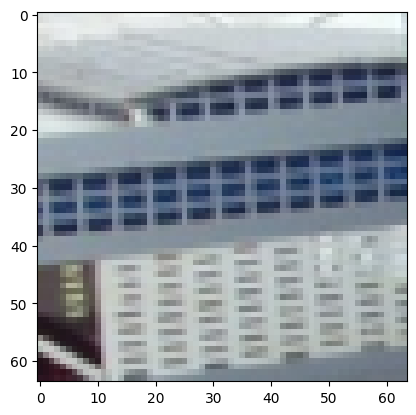

Истинный класс: Furniture, Предсказанный класс: Furniture


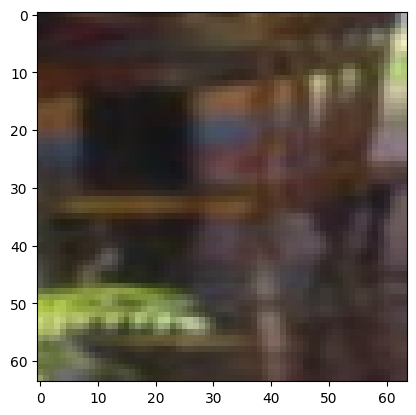

Истинный класс: Mammal, Предсказанный класс: Clothing


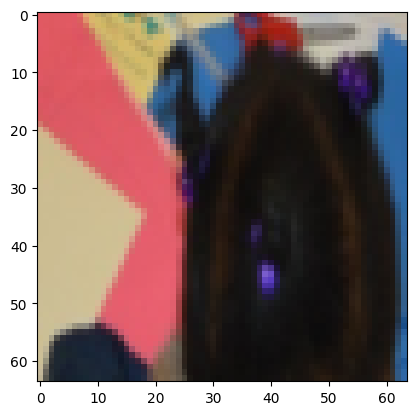

Истинный класс: Footwear, Предсказанный класс: Table


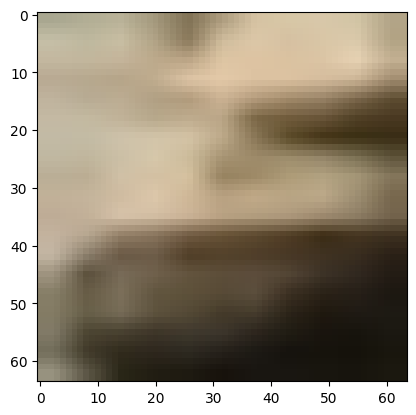

labels ---> tensor([33, 57, 91, 86])
predicted ---> tensor([38, 57, 68, 89])
total ---> 100
correct ---> 19
Истинный класс: Furniture, Предсказанный класс: House


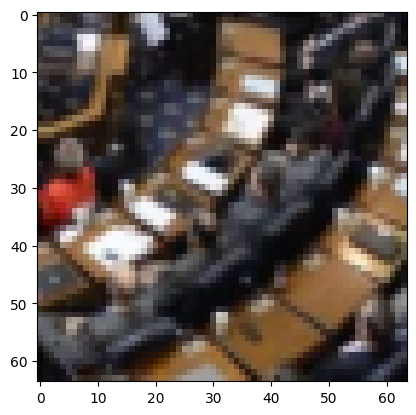

Истинный класс: Light bulb, Предсказанный класс: Light bulb


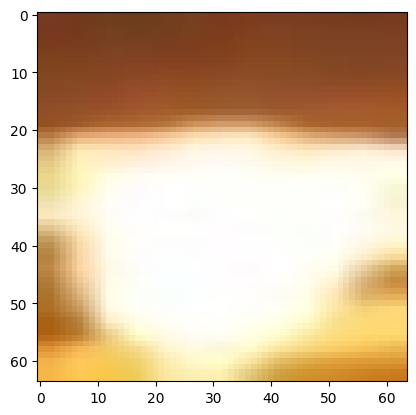

Истинный класс: Vegetable, Предсказанный класс: Poster


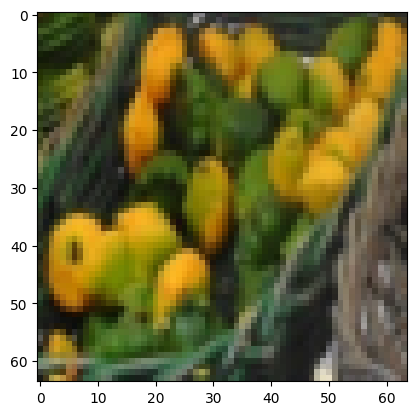

Истинный класс: Tower, Предсказанный класс: Tree


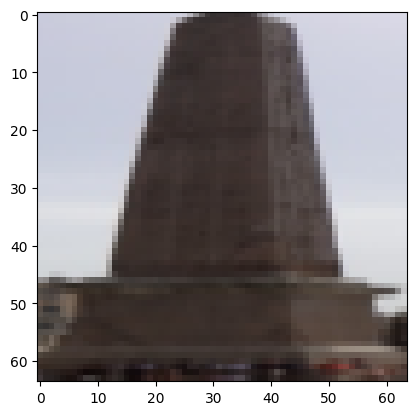

labels ---> tensor([64, 68, 80, 38])
predicted ---> tensor([ 9, 68, 95, 38])
total ---> 104
correct ---> 21
Истинный класс: Person, Предсказанный класс: Car


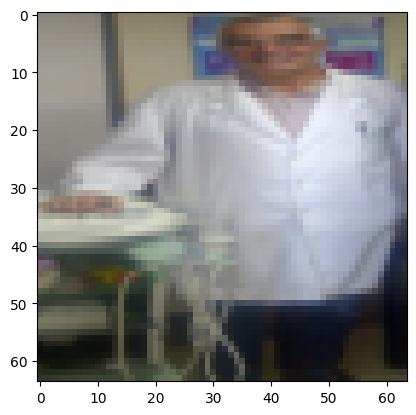

Истинный класс: Poster, Предсказанный класс: Poster


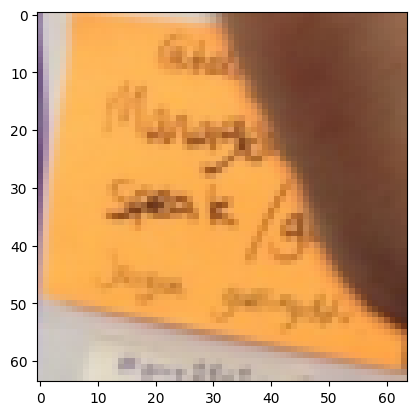

Истинный класс: Tableware, Предсказанный класс: Window


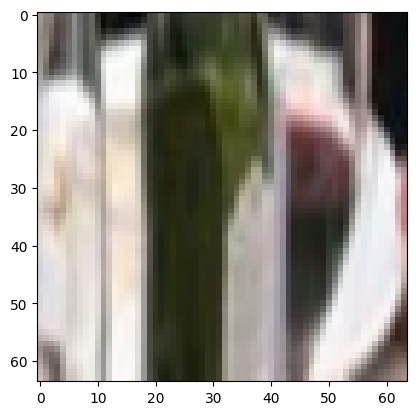

Истинный класс: House, Предсказанный класс: House


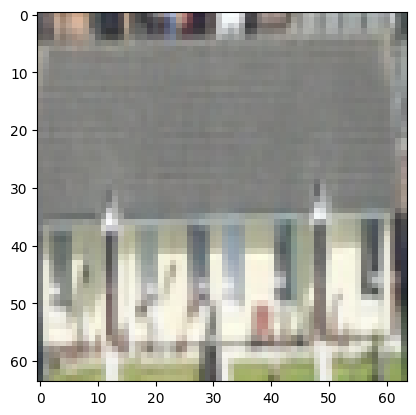

labels ---> tensor([33, 38, 38, 45])
predicted ---> tensor([41, 38, 95, 68])
total ---> 108
correct ---> 22
Истинный класс: Furniture, Предсказанный класс: Human body


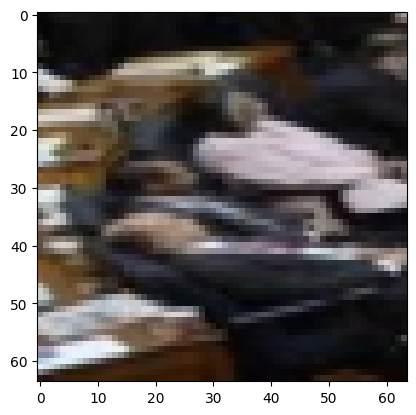

Истинный класс: House, Предсказанный класс: House


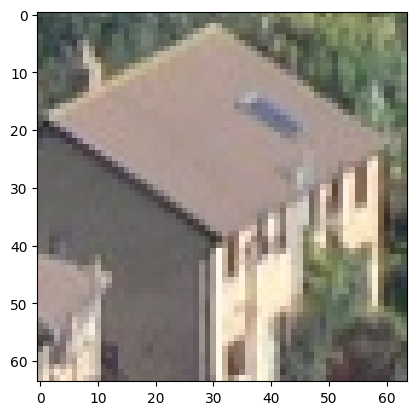

Истинный класс: House, Предсказанный класс: Window


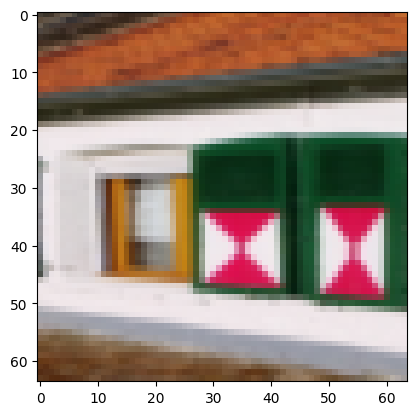

Истинный класс: Human hand, Предсказанный класс: Poster


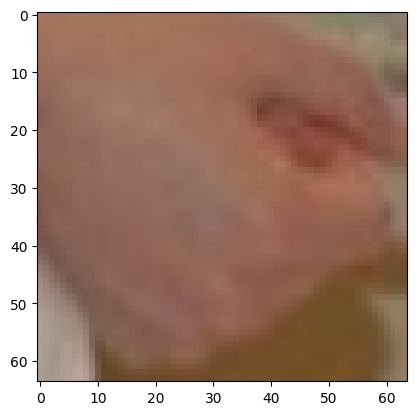

labels ---> tensor([97, 31, 95, 95])
predicted ---> tensor([ 6, 37, 95, 95])
total ---> 112
correct ---> 24
Истинный класс: Woman, Предсказанный класс: Building


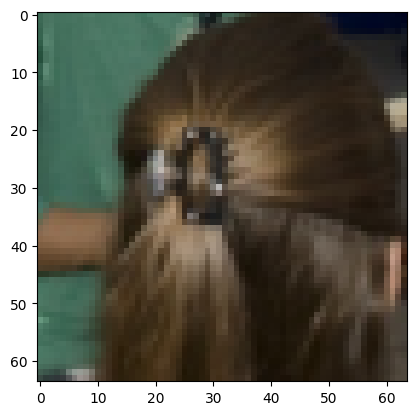

Истинный класс: Footwear, Предсказанный класс: Home appliance


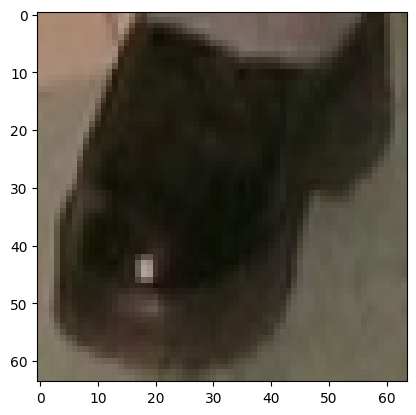

Истинный класс: Window, Предсказанный класс: Window


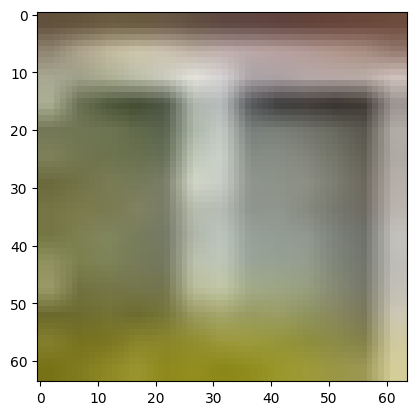

Истинный класс: Window, Предсказанный класс: Window


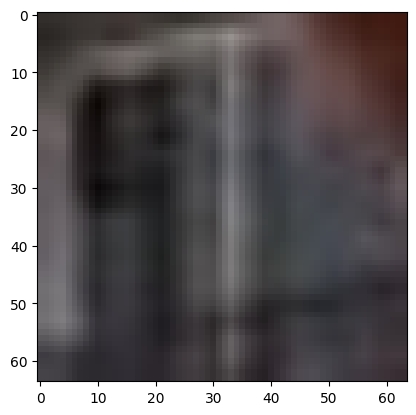

labels ---> tensor([ 6, 89, 95, 45])
predicted ---> tensor([ 6, 33, 95, 23])
total ---> 116
correct ---> 26
Истинный класс: Building, Предсказанный класс: Building


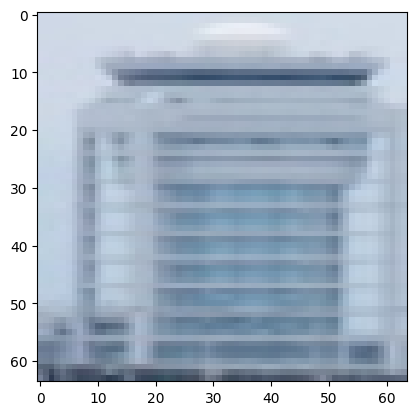

Истинный класс: Tree, Предсказанный класс: Furniture


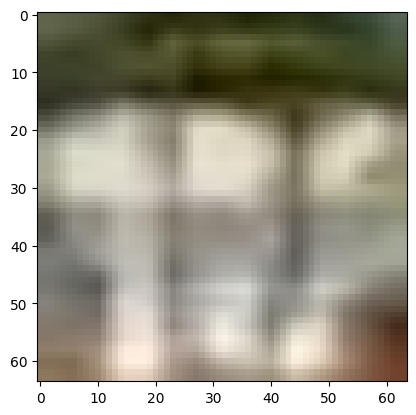

Истинный класс: Window, Предсказанный класс: Window


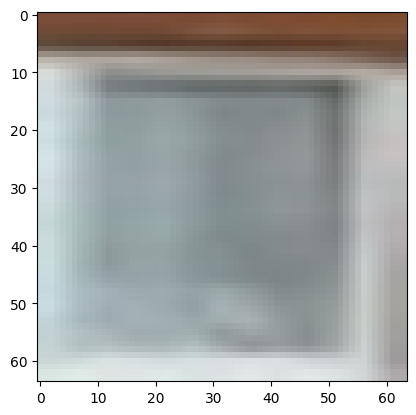

Истинный класс: Human hand, Предсказанный класс: Drawer


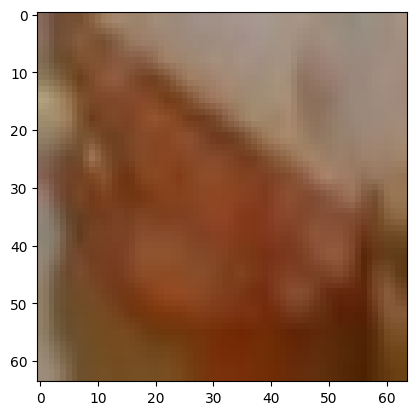

labels ---> tensor([ 8, 95, 35,  6])
predicted ---> tensor([62, 95, 68, 95])
total ---> 120
correct ---> 27
Истинный класс: Cabinetry, Предсказанный класс: Office supplies


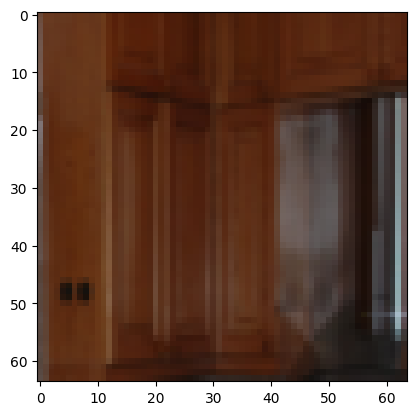

Истинный класс: Window, Предсказанный класс: Window


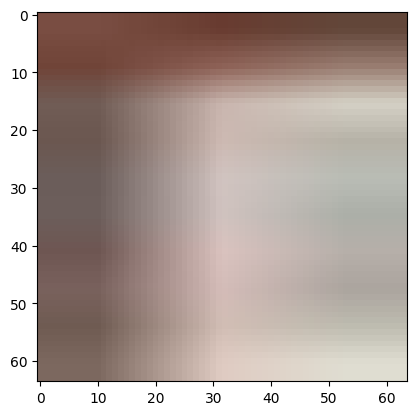

Истинный класс: Girl, Предсказанный класс: Poster


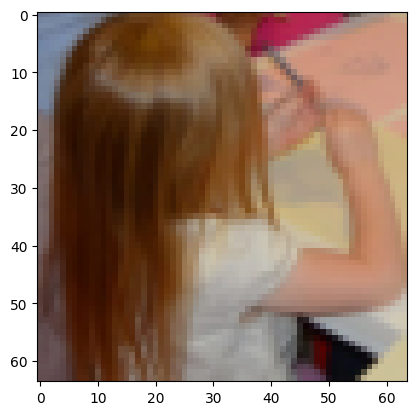

Истинный класс: Building, Предсказанный класс: Window


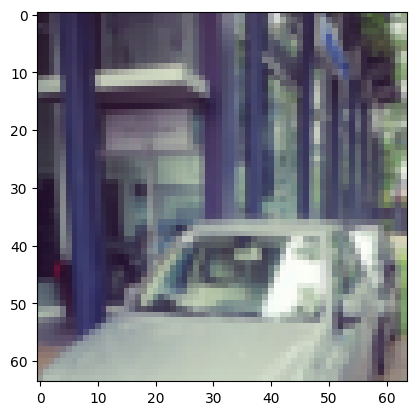

labels ---> tensor([66, 95, 46, 95])
predicted ---> tensor([33, 95, 46, 95])
total ---> 124
correct ---> 30
Истинный класс: Plant, Предсказанный класс: Furniture


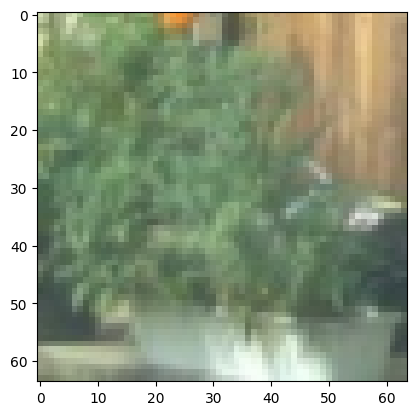

Истинный класс: Window, Предсказанный класс: Window


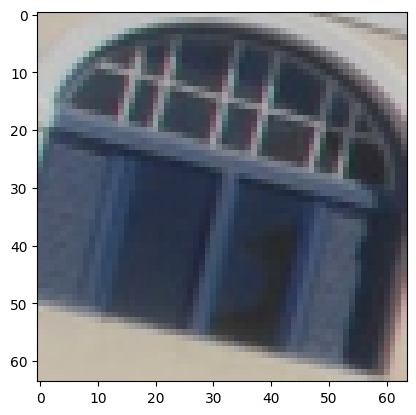

Истинный класс: Human head, Предсказанный класс: Human head


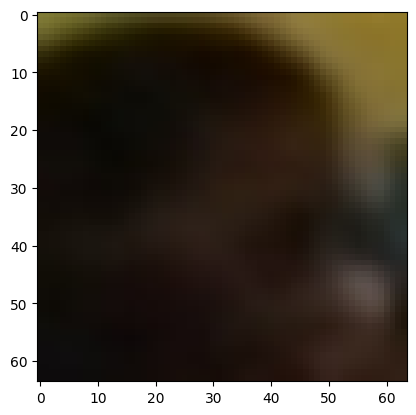

Истинный класс: Window, Предсказанный класс: Window


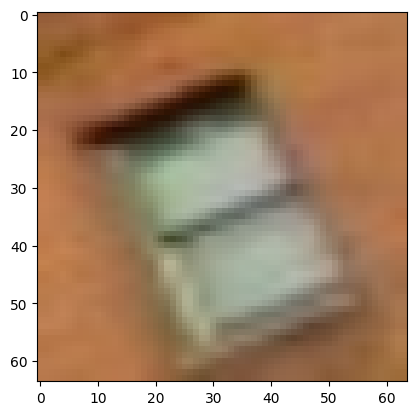

labels ---> tensor([21, 95,  9, 95])
predicted ---> tensor([14,  6,  9, 95])
total ---> 128
correct ---> 32
Истинный класс: Desk, Предсказанный класс: Coffee table


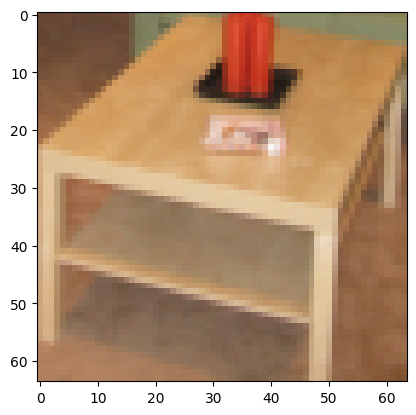

Истинный класс: Window, Предсказанный класс: Building


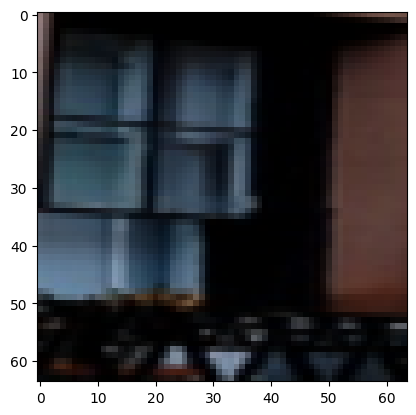

Истинный класс: Car, Предсказанный класс: Car


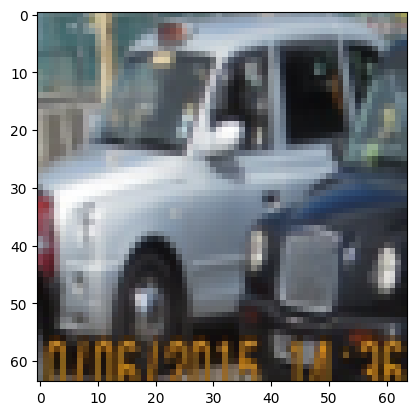

Истинный класс: Window, Предсказанный класс: Window


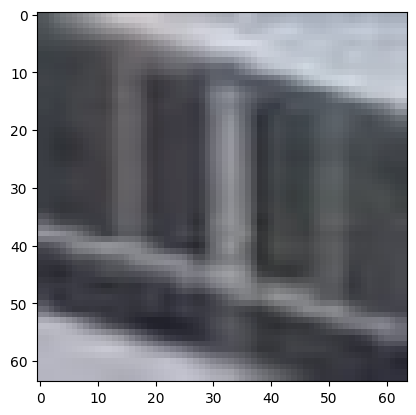

labels ---> tensor([43, 59, 33, 80])
predicted ---> tensor([43, 64,  6, 80])
total ---> 132
correct ---> 34
Истинный класс: Human face, Предсказанный класс: Human face


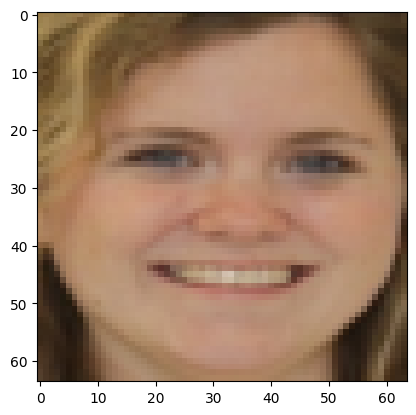

Истинный класс: Man, Предсказанный класс: Person


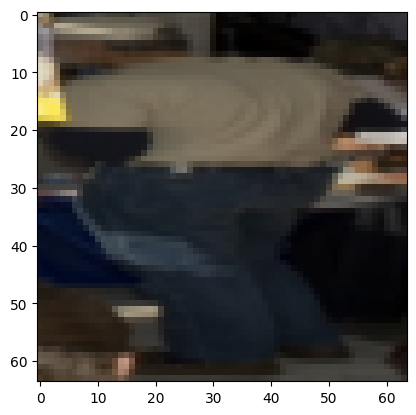

Истинный класс: Furniture, Предсказанный класс: Building


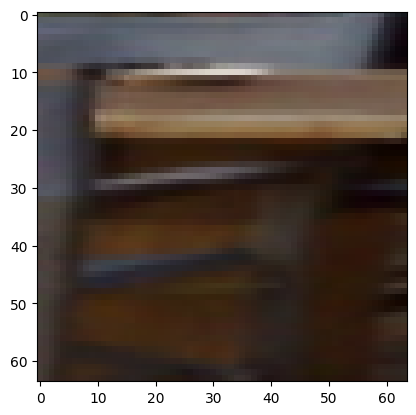

Истинный класс: Tableware, Предсказанный класс: Tableware


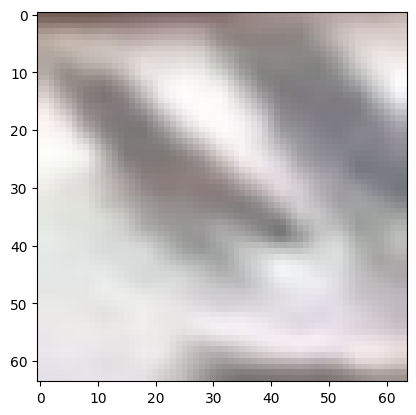

labels ---> tensor([43, 33,  6, 64])
predicted ---> tensor([43, 80, 40, 33])
total ---> 136
correct ---> 35
Истинный класс: Human face, Предсказанный класс: Human face


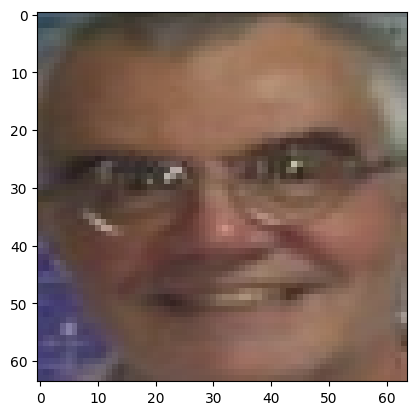

Истинный класс: Furniture, Предсказанный класс: Tableware


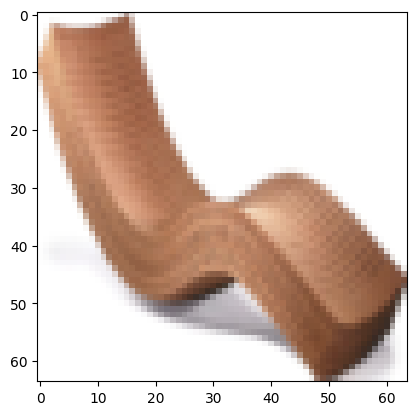

Истинный класс: Building, Предсказанный класс: Human arm


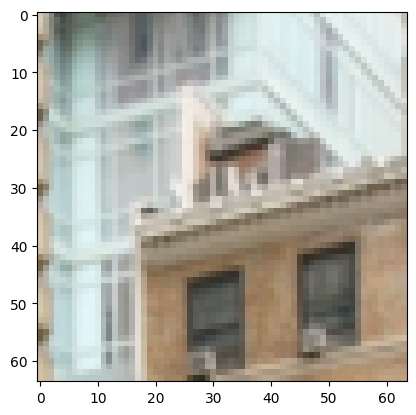

Истинный класс: Person, Предсказанный класс: Furniture


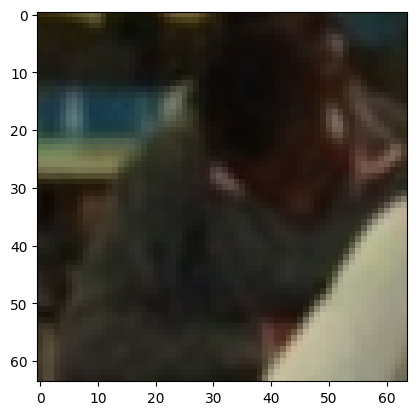

labels ---> tensor([95, 71, 68, 95])
predicted ---> tensor([95, 94,  6, 95])
total ---> 140
correct ---> 37
Истинный класс: Window, Предсказанный класс: Window


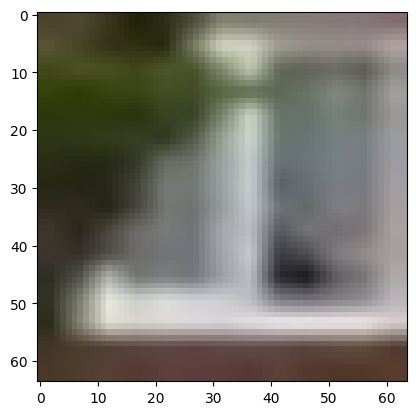

Истинный класс: Shelf, Предсказанный класс: Wheel


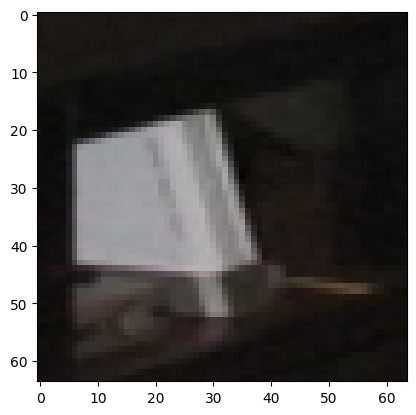

Истинный класс: Poster, Предсказанный класс: Building


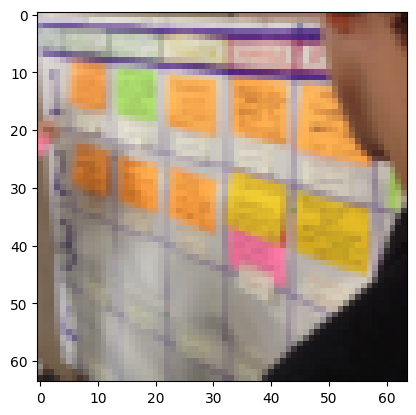

Истинный класс: Window, Предсказанный класс: Window


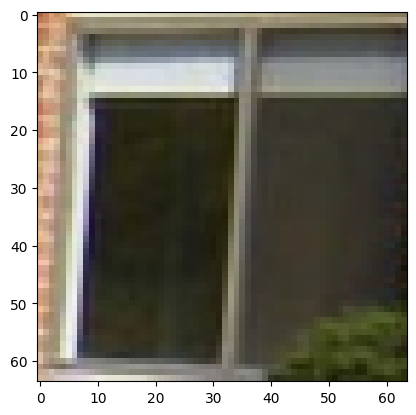

labels ---> tensor([30, 38, 57, 46])
predicted ---> tensor([91,  6, 57, 80])
total ---> 144
correct ---> 38
Истинный класс: Food, Предсказанный класс: Vegetable


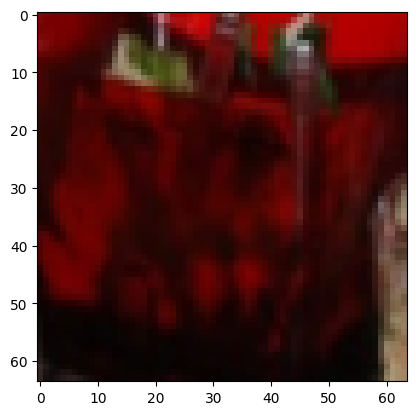

Истинный класс: House, Предсказанный класс: Building


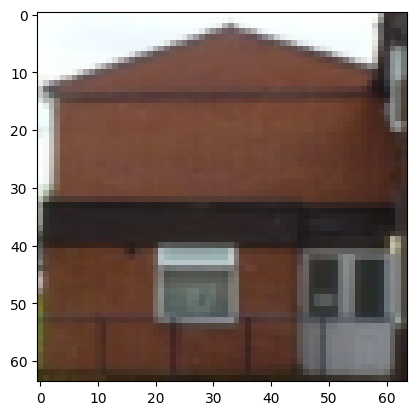

Истинный класс: Light bulb, Предсказанный класс: Light bulb


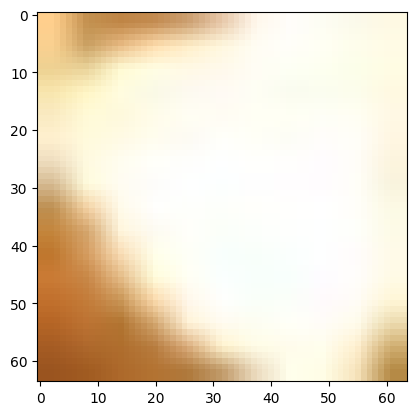

Истинный класс: Human head, Предсказанный класс: Tableware


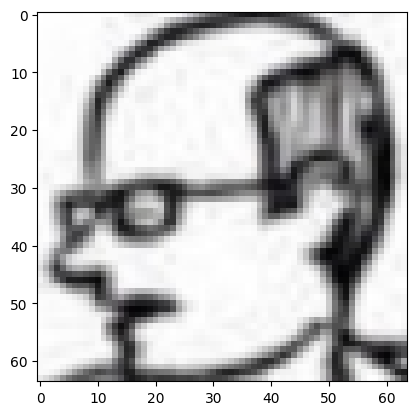

labels ---> tensor([59, 55, 95, 95])
predicted ---> tensor([95,  6, 95, 79])
total ---> 148
correct ---> 39
Истинный класс: Man, Предсказанный класс: Window


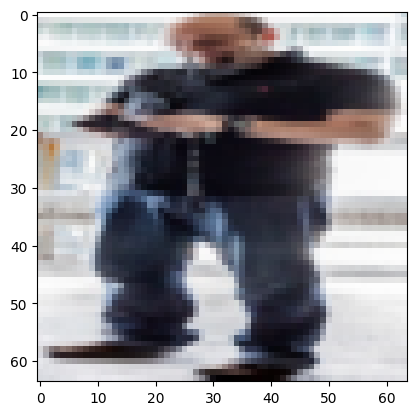

Истинный класс: Land vehicle, Предсказанный класс: Building


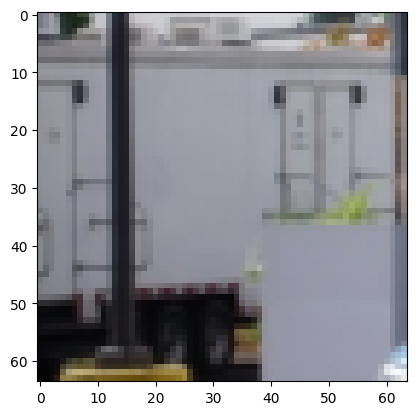

Истинный класс: Window, Предсказанный класс: Window


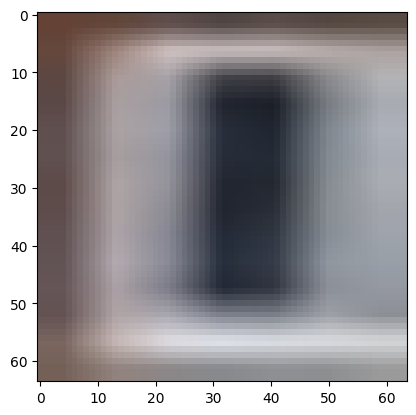

Истинный класс: Window, Предсказанный класс: Table


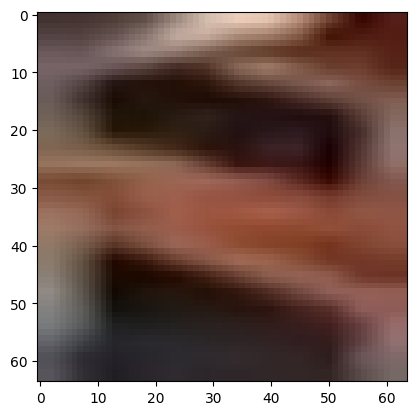

labels ---> tensor([78, 95, 64, 58])
predicted ---> tensor([59, 95, 38, 45])
total ---> 152
correct ---> 40
Истинный класс: Swimming pool, Предсказанный класс: Man


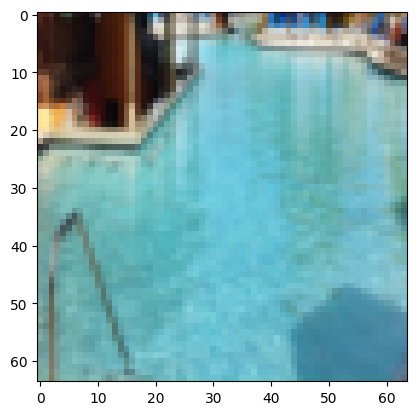

Истинный класс: Window, Предсказанный класс: Window


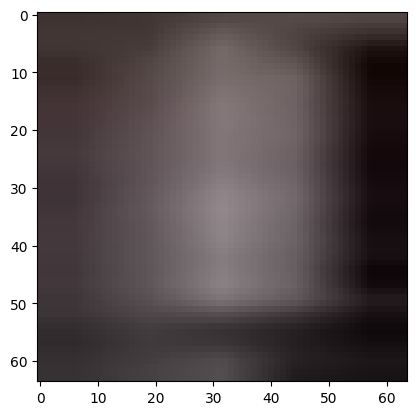

Истинный класс: Person, Предсказанный класс: House


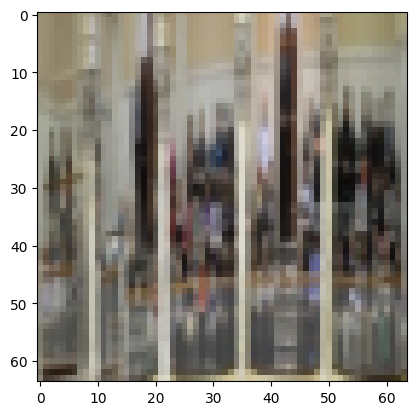

Истинный класс: Mammal, Предсказанный класс: Human hand


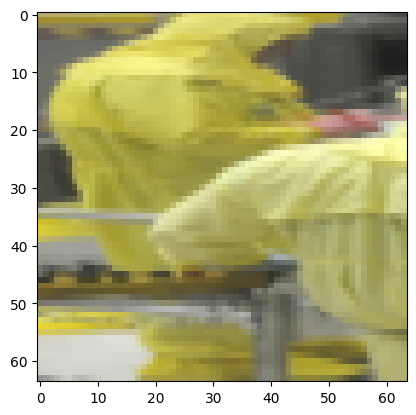

labels ---> tensor([44, 92, 87, 33])
predicted ---> tensor([44, 89, 87, 95])
total ---> 156
correct ---> 42
Истинный класс: Human hair, Предсказанный класс: Human hair


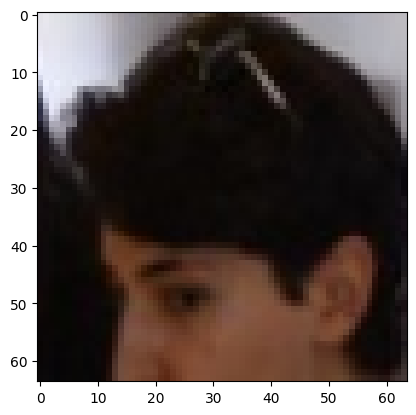

Истинный класс: Vehicle, Предсказанный класс: Tree


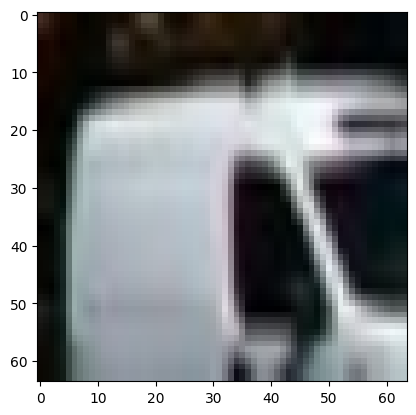

Истинный класс: Toy, Предсказанный класс: Toy


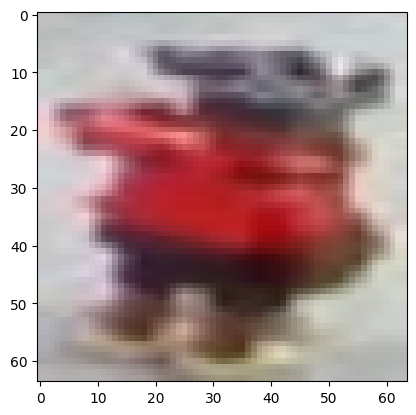

Истинный класс: Furniture, Предсказанный класс: Window


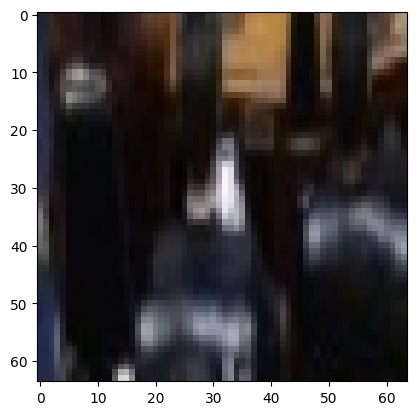

labels ---> tensor([ 6,  1, 64, 64])
predicted ---> tensor([ 6, 95, 33, 95])
total ---> 160
correct ---> 43
Истинный класс: Building, Предсказанный класс: Building


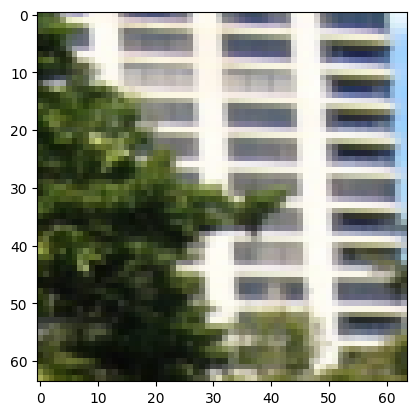

Истинный класс: Airplane, Предсказанный класс: Window


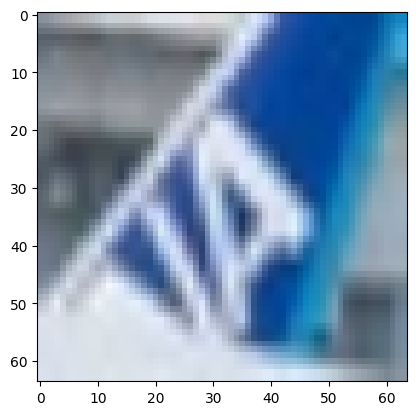

Истинный класс: Person, Предсказанный класс: Furniture


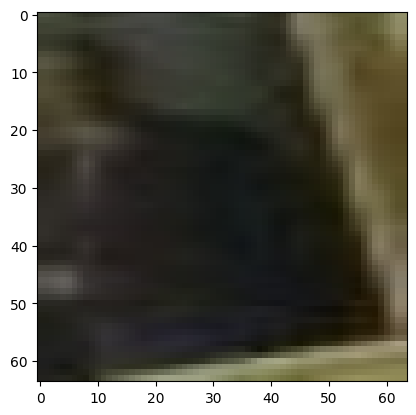

Истинный класс: Person, Предсказанный класс: Window


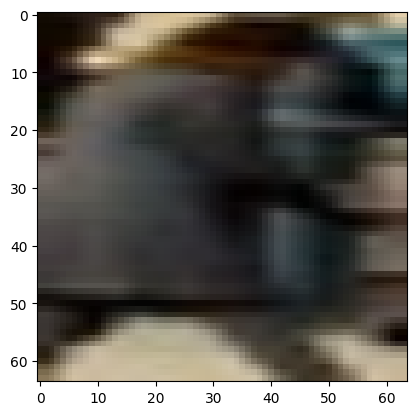

labels ---> tensor([95,  6,  1, 13])
predicted ---> tensor([95,  6,  6, 44])
total ---> 164
correct ---> 45
Истинный класс: Window, Предсказанный класс: Window


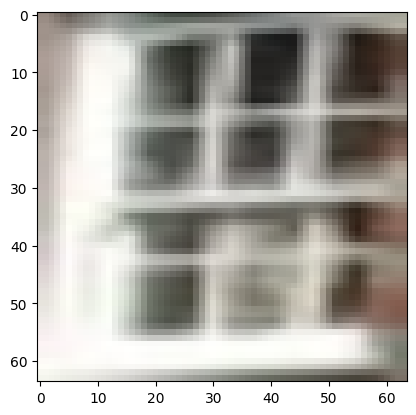

Истинный класс: Building, Предсказанный класс: Building


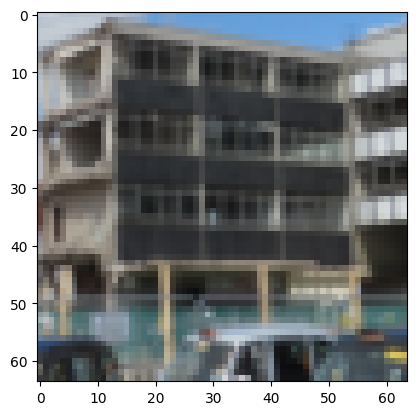

Истинный класс: Airplane, Предсказанный класс: Building


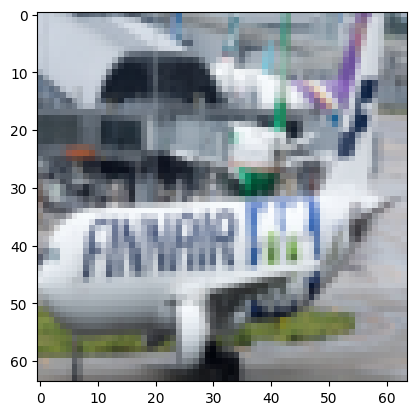

Истинный класс: Clothing, Предсказанный класс: Human hair


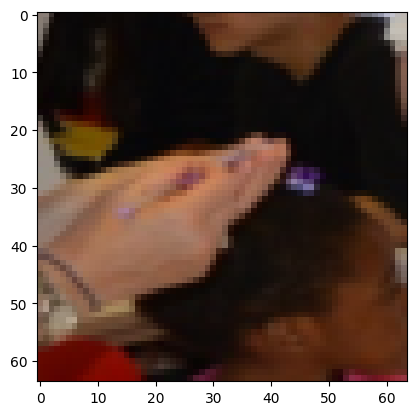

labels ---> tensor([ 1, 89, 89, 33])
predicted ---> tensor([ 9, 38,  9, 95])
total ---> 168
correct ---> 45
Истинный класс: Airplane, Предсказанный класс: Car


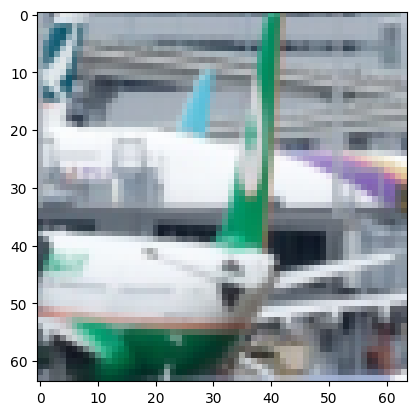

Истинный класс: Tree, Предсказанный класс: House


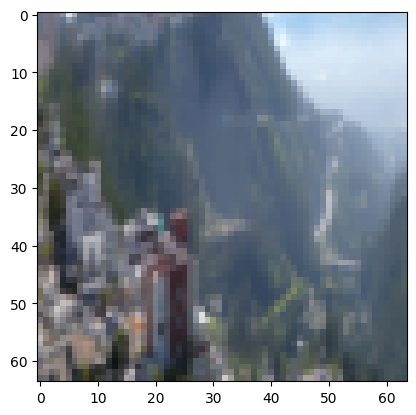

Истинный класс: Tree, Предсказанный класс: Car


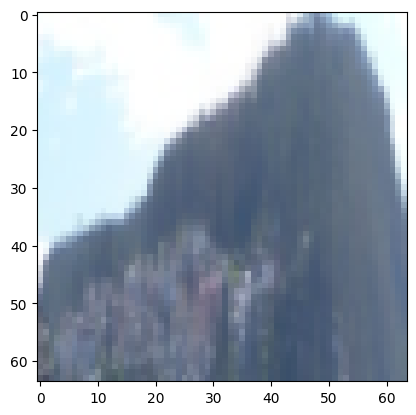

Истинный класс: Furniture, Предсказанный класс: Window


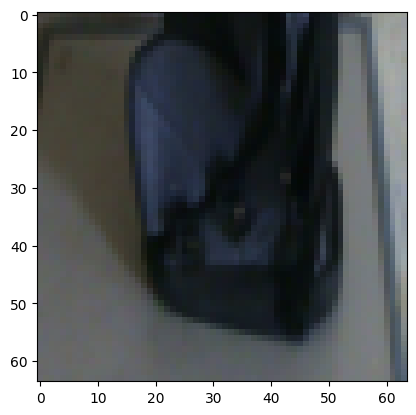

labels ---> tensor([95, 80, 68, 38])
predicted ---> tensor([64, 38, 80, 38])
total ---> 172
correct ---> 46
Истинный класс: Window, Предсказанный класс: Person


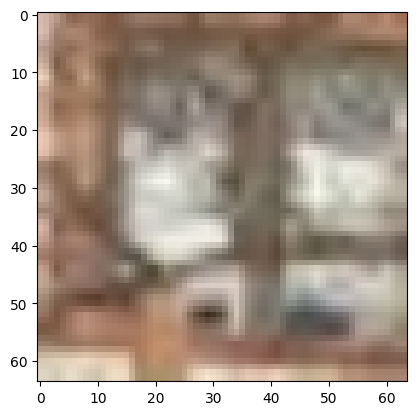

Истинный класс: Tableware, Предсказанный класс: House


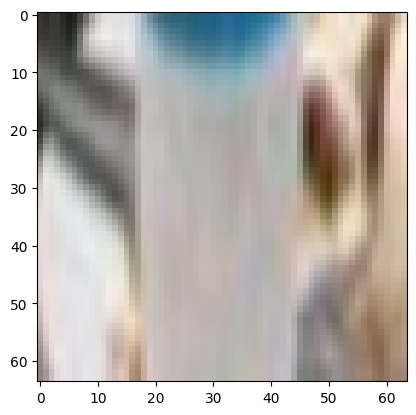

Истинный класс: Poster, Предсказанный класс: Tableware


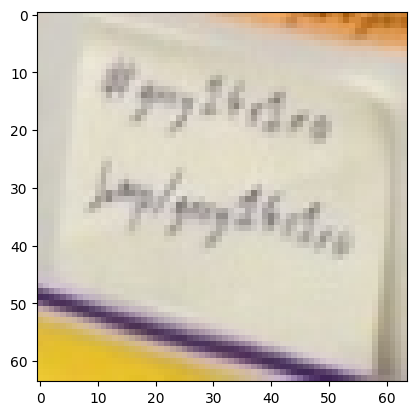

Истинный класс: House, Предсказанный класс: House


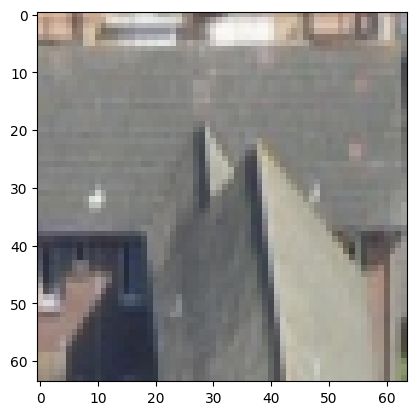

labels ---> tensor([89, 29, 33, 64])
predicted ---> tensor([33, 33, 13, 64])
total ---> 176
correct ---> 47
Истинный класс: Tree, Предсказанный класс: Furniture


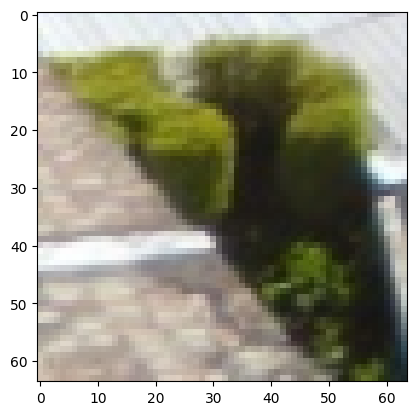

Истинный класс: Flowerpot, Предсказанный класс: Furniture


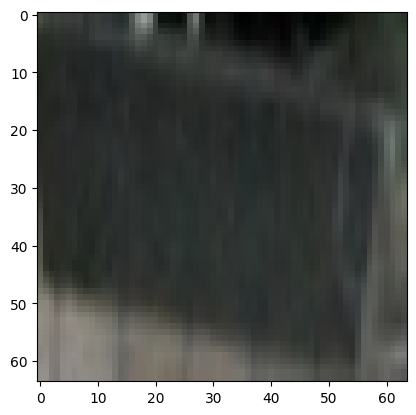

Истинный класс: Furniture, Предсказанный класс: Clothing


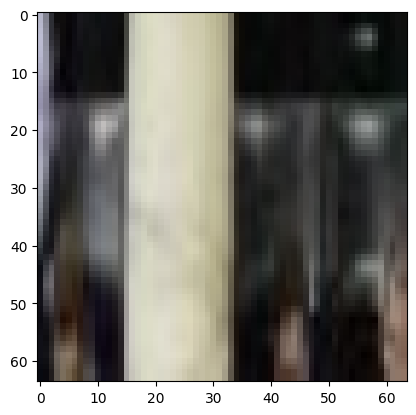

Истинный класс: Person, Предсказанный класс: Person


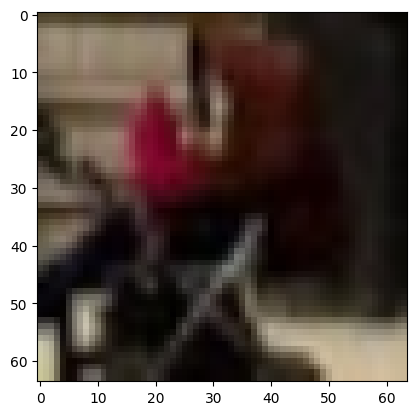

labels ---> tensor([38, 43, 95, 87])
predicted ---> tensor([95, 79, 95, 79])
total ---> 180
correct ---> 48
Истинный класс: House, Предсказанный класс: Window


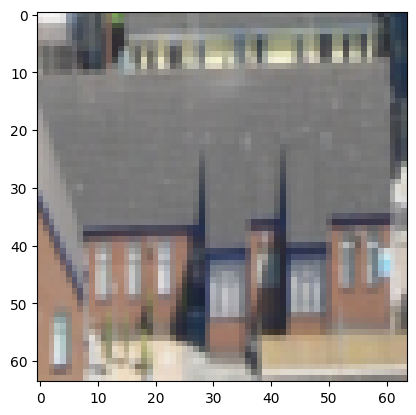

Истинный класс: Human face, Предсказанный класс: Table


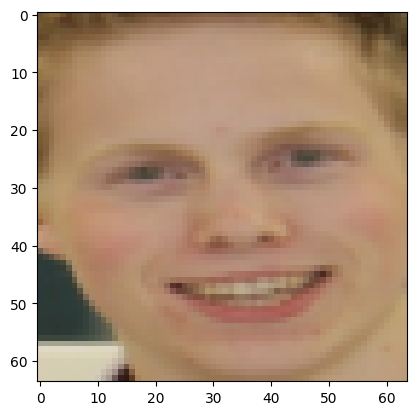

Истинный класс: Window, Предсказанный класс: Window


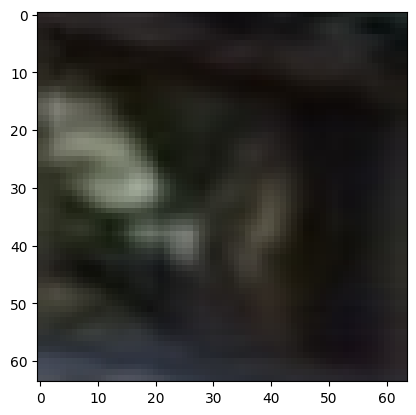

Истинный класс: Toy, Предсказанный класс: Table


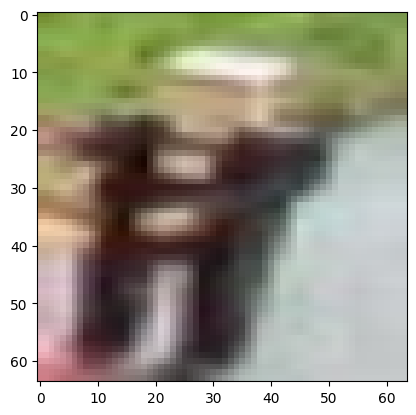

labels ---> tensor([63, 31, 89, 11])
predicted ---> tensor([95, 95,  6, 80])
total ---> 184
correct ---> 48
Истинный класс: Palm tree, Предсказанный класс: Window


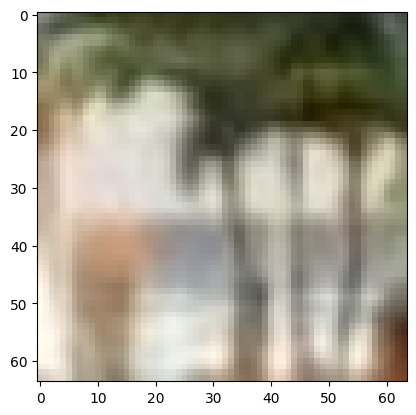

Истинный класс: Footwear, Предсказанный класс: Window


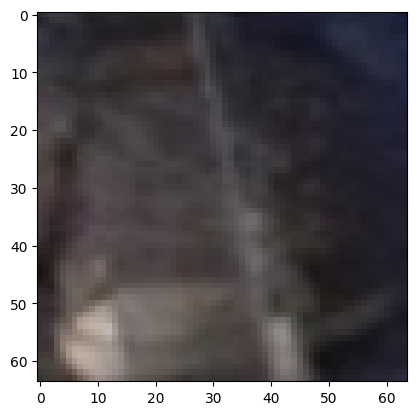

Истинный класс: Tree, Предсказанный класс: Building


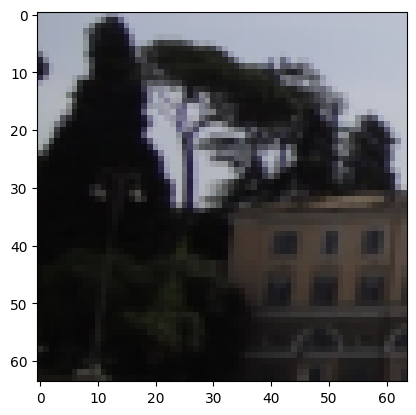

Истинный класс: Chair, Предсказанный класс: Tableware


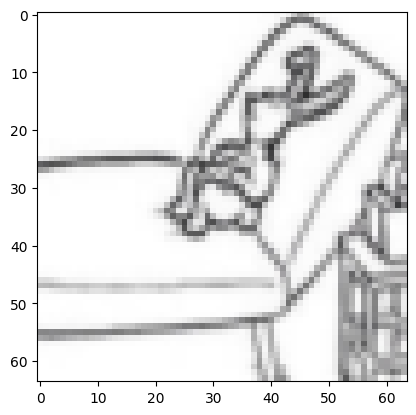

labels ---> tensor([71, 35, 33, 38])
predicted ---> tensor([79, 44,  6, 38])
total ---> 188
correct ---> 49
Истинный класс: Shelf, Предсказанный класс: Table


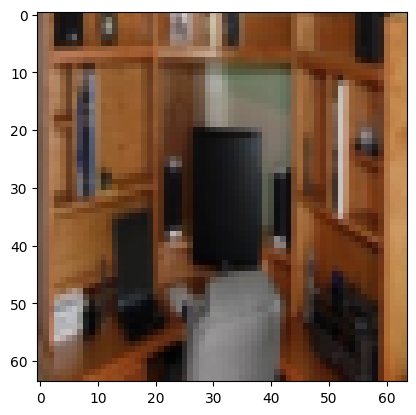

Истинный класс: Girl, Предсказанный класс: Human hair


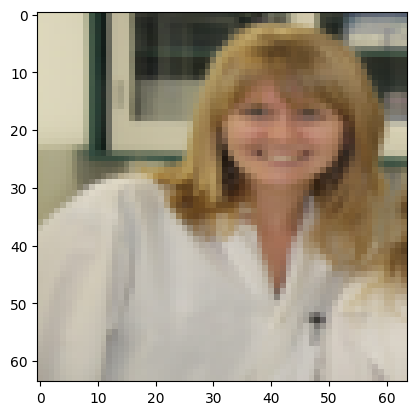

Истинный класс: Furniture, Предсказанный класс: Building


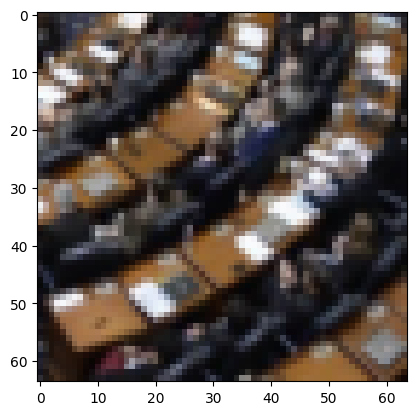

Истинный класс: House, Предсказанный класс: House


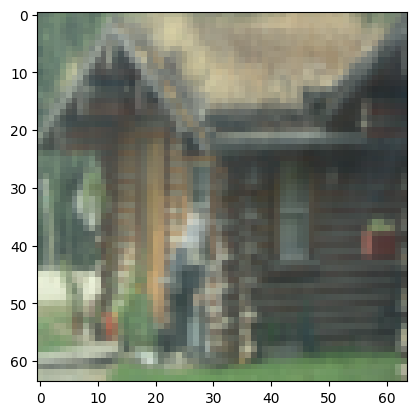

labels ---> tensor([46,  6,  0, 95])
predicted ---> tensor([46, 87, 30, 95])
total ---> 192
correct ---> 51
Истинный класс: Human head, Предсказанный класс: Human head


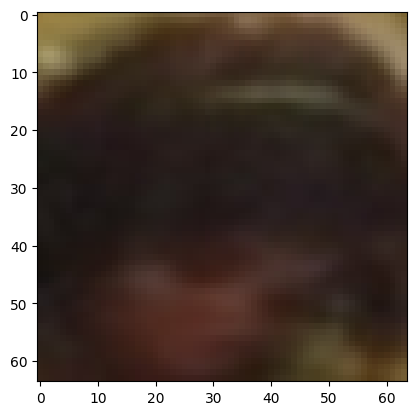

Истинный класс: Building, Предсказанный класс: Toy


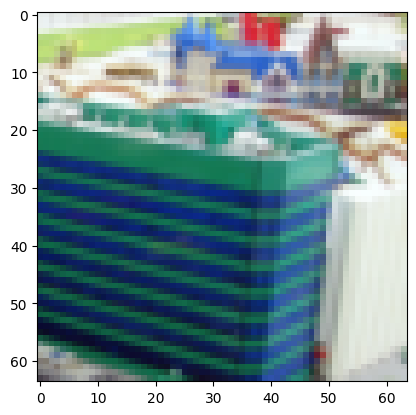

Истинный класс: Aircraft, Предсказанный класс: Food


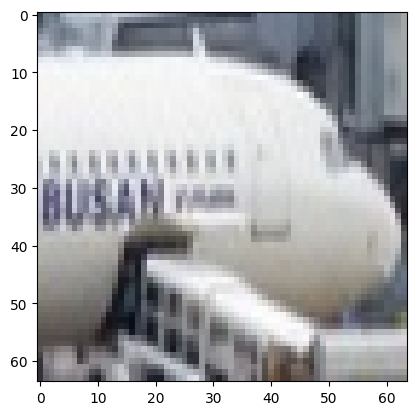

Истинный класс: Window, Предсказанный класс: Window


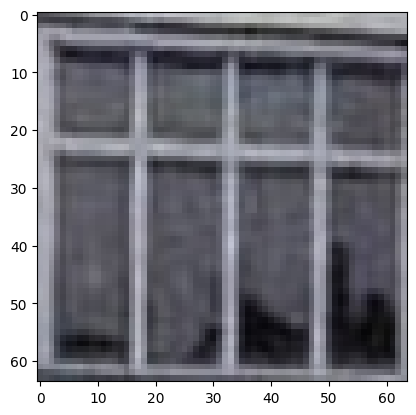

labels ---> tensor([65, 87, 59, 89])
predicted ---> tensor([33, 64, 95,  6])
total ---> 196
correct ---> 51
Истинный класс: Pillow, Предсказанный класс: Furniture


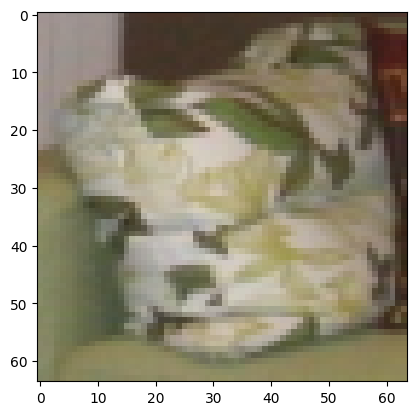

Истинный класс: Toy, Предсказанный класс: Person


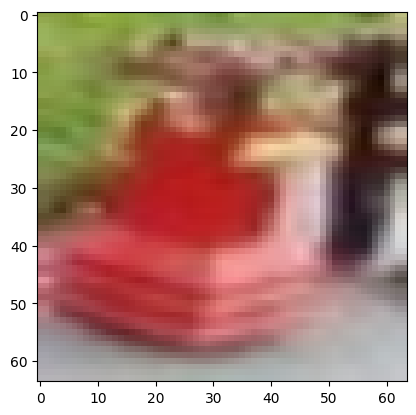

Истинный класс: Man, Предсказанный класс: Window


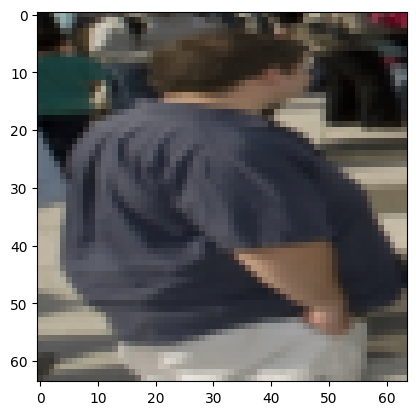

Истинный класс: Tree, Предсказанный класс: Building


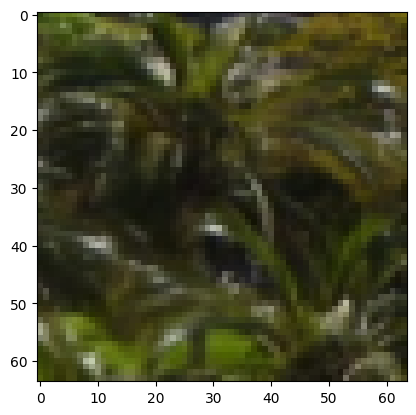

labels ---> tensor([ 9, 95, 79, 19])
predicted ---> tensor([11, 95, 89, 38])
total ---> 200
correct ---> 52
Истинный класс: Car, Предсказанный класс: Chair


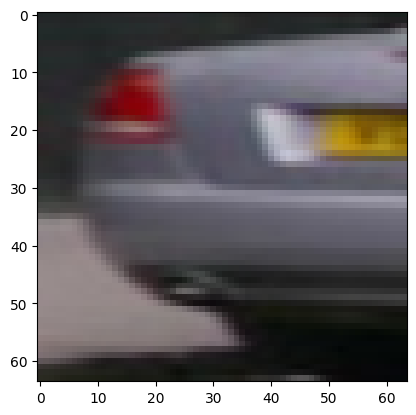

Истинный класс: Window, Предсказанный класс: Window


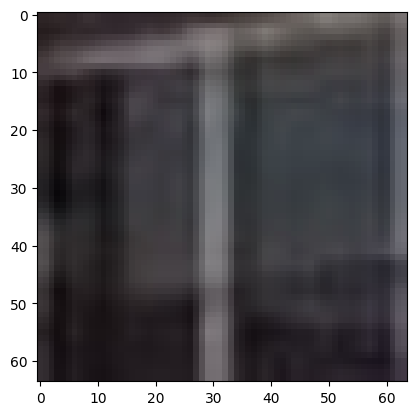

Истинный класс: Table, Предсказанный класс: Tree


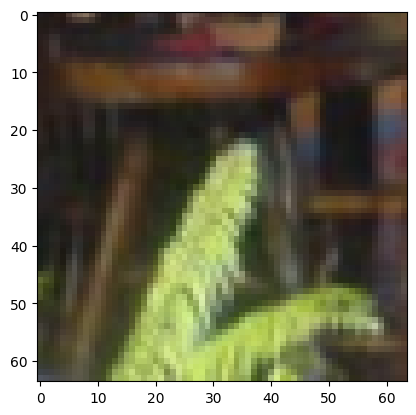

Истинный класс: Cupboard, Предсказанный класс: House


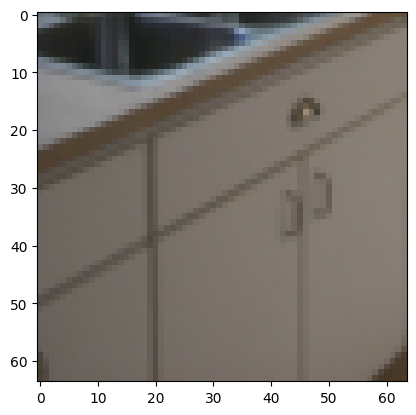

labels ---> tensor([ 3, 95, 65, 95])
predicted ---> tensor([95, 95, 80, 95])
total ---> 204
correct ---> 54
Истинный класс: Bathroom cabinet, Предсказанный класс: Window


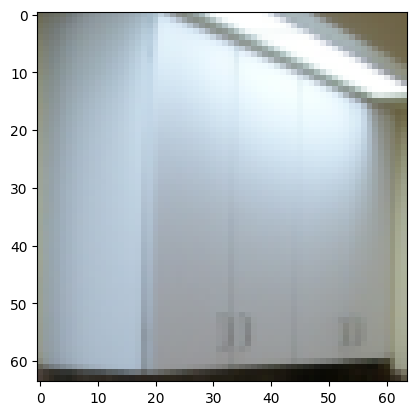

Истинный класс: Window, Предсказанный класс: Window


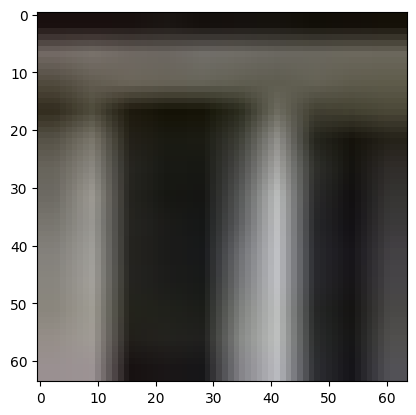

Истинный класс: Pillow, Предсказанный класс: Tableware


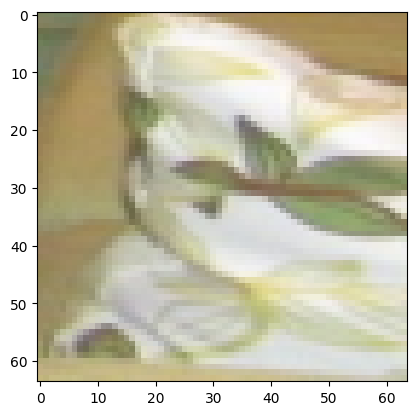

Истинный класс: Window, Предсказанный класс: Window


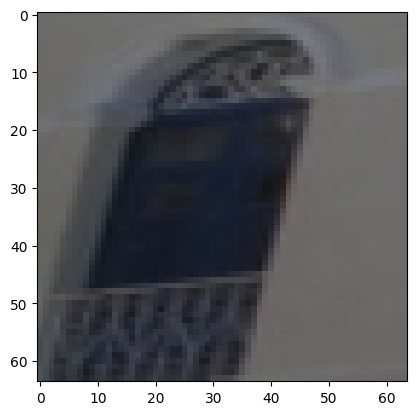

labels ---> tensor([62,  9, 95, 93])
predicted ---> tensor([80, 82, 95,  6])
total ---> 208
correct ---> 55
Истинный класс: Office supplies, Предсказанный класс: Tableware


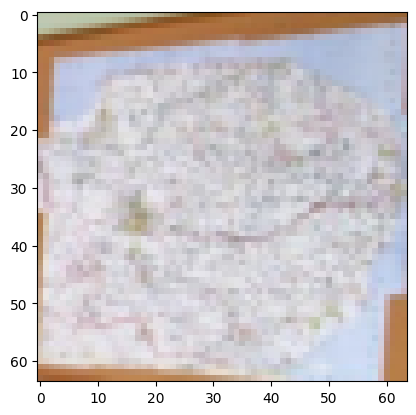

Истинный класс: Car, Предсказанный класс: Taxi


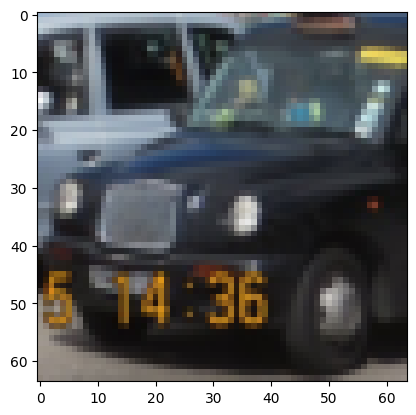

Истинный класс: Window, Предсказанный класс: Window


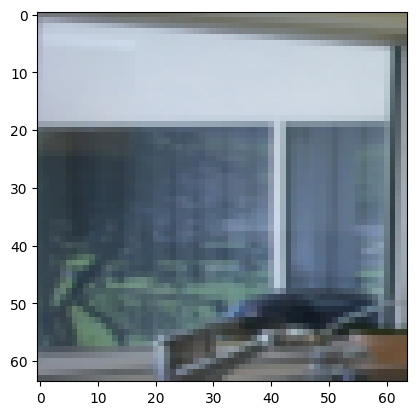

Истинный класс: Vehicle registration plate, Предсказанный класс: Building


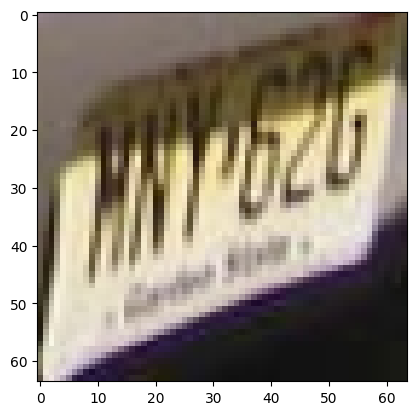

labels ---> tensor([97, 13, 39, 46])
predicted ---> tensor([58, 13,  9, 23])
total ---> 212
correct ---> 56
Истинный класс: Woman, Предсказанный класс: Mammal


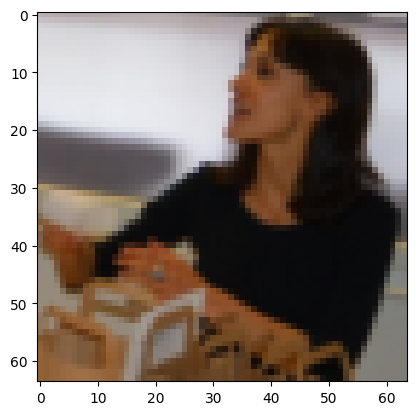

Истинный класс: Clothing, Предсказанный класс: Clothing


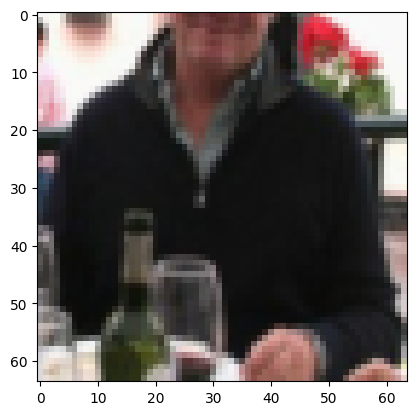

Истинный класс: Houseplant, Предсказанный класс: Car


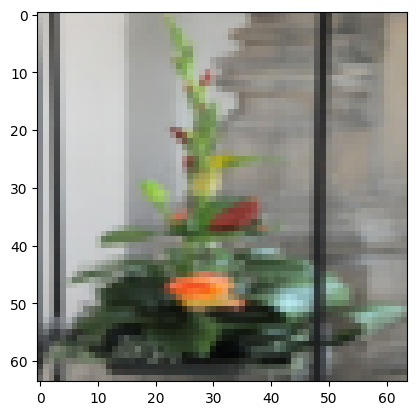

Истинный класс: Human head, Предсказанный класс: Drawer


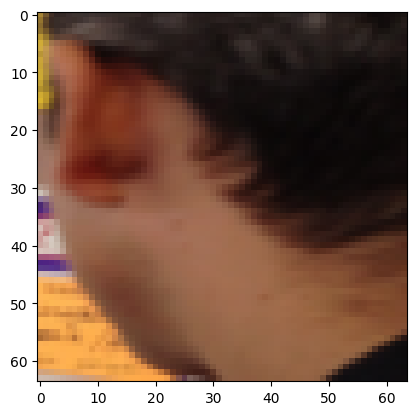

labels ---> tensor([59, 89, 64, 45])
predicted ---> tensor([33,  6, 59, 87])
total ---> 216
correct ---> 56
Истинный класс: Man, Предсказанный класс: Furniture


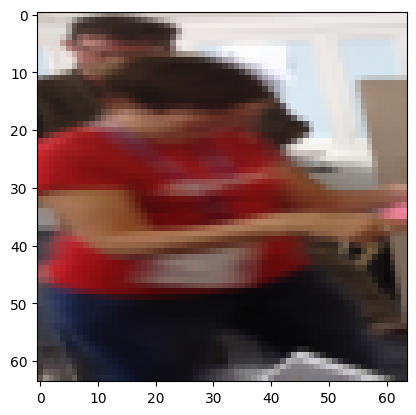

Истинный класс: Tree, Предсказанный класс: Building


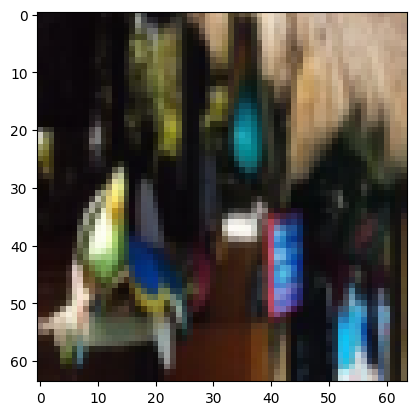

Истинный класс: Person, Предсказанный класс: Man


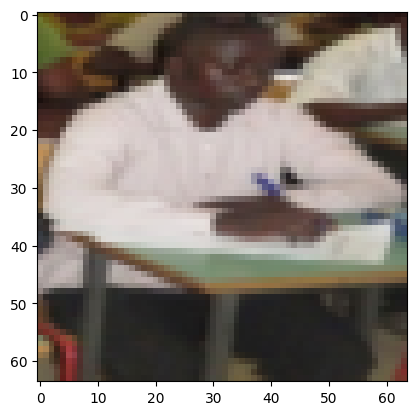

Истинный класс: Human hand, Предсказанный класс: Toy


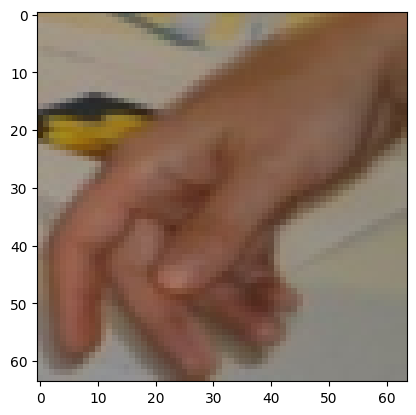

labels ---> tensor([57, 38, 59, 58])
predicted ---> tensor([80, 38, 95, 64])
total ---> 220
correct ---> 57
Истинный класс: Light bulb, Предсказанный класс: Tableware


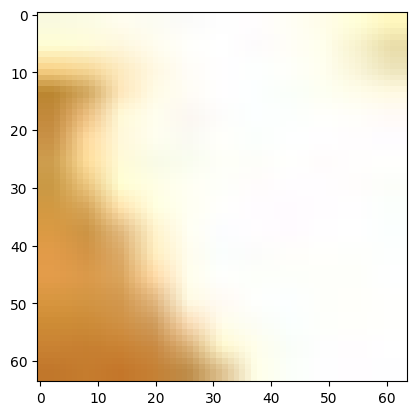

Истинный класс: House, Предсказанный класс: House


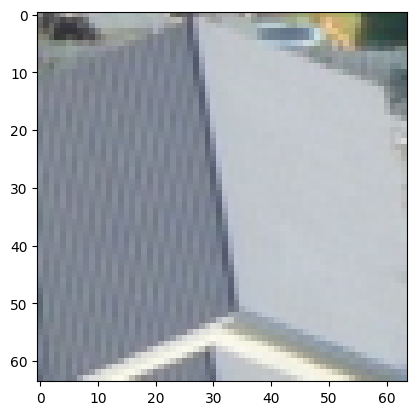

Истинный класс: Man, Предсказанный класс: Window


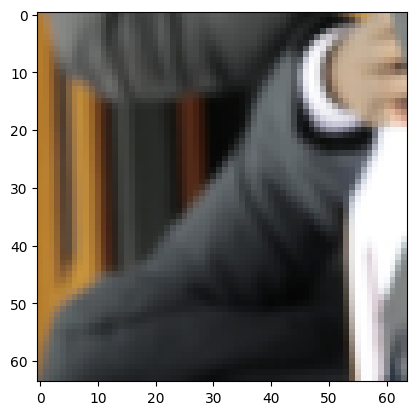

Истинный класс: Mammal, Предсказанный класс: Person


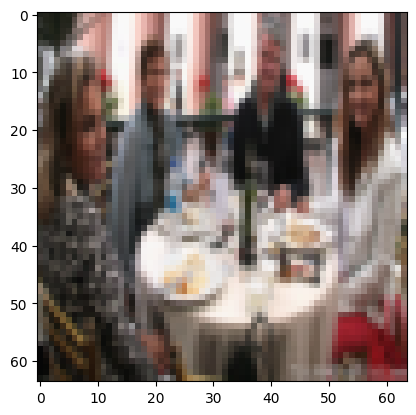

labels ---> tensor([79, 22,  8, 17])
predicted ---> tensor([33, 33, 80, 95])
total ---> 224
correct ---> 57
Истинный класс: Table, Предсказанный класс: Furniture


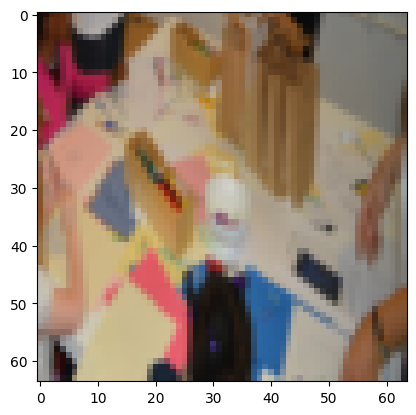

Истинный класс: Door, Предсказанный класс: Furniture


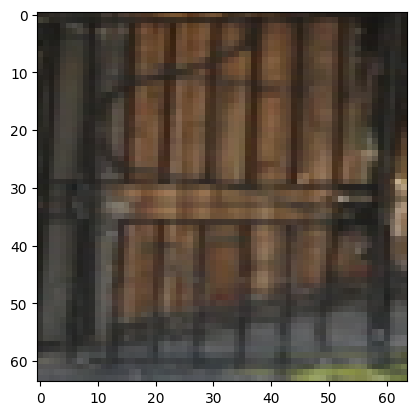

Истинный класс: Cabinetry, Предсказанный класс: Tableware


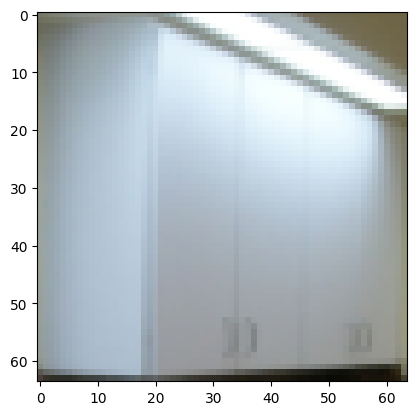

Истинный класс: Couch, Предсказанный класс: Window


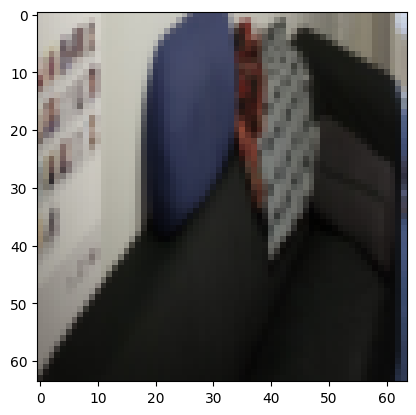

labels ---> tensor([38, 68, 40, 95])
predicted ---> tensor([13, 30, 45, 95])
total ---> 228
correct ---> 58
Истинный класс: House, Предсказанный класс: Clothing


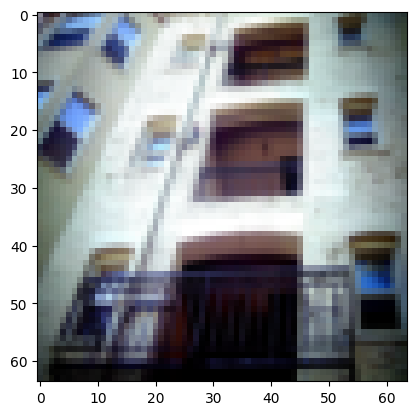

Истинный класс: Poster, Предсказанный класс: Food


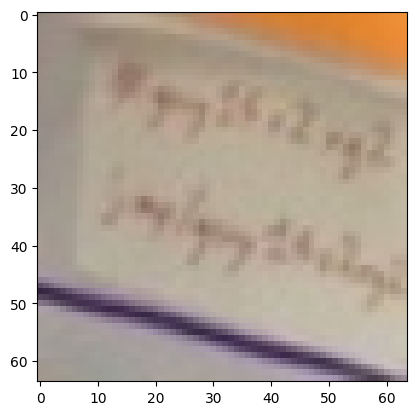

Истинный класс: Human arm, Предсказанный класс: Human hand


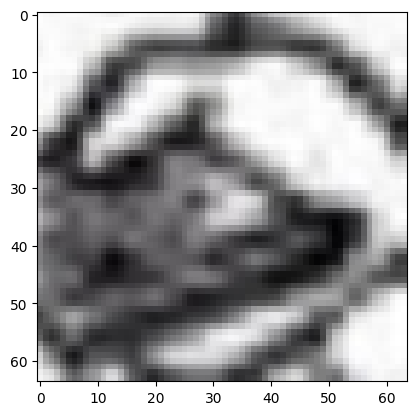

Истинный класс: Window, Предсказанный класс: Window


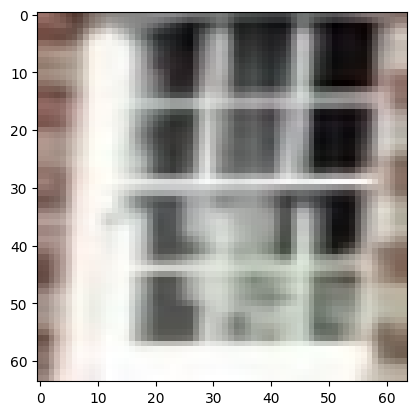

labels ---> tensor([89, 68,  8, 46])
predicted ---> tensor([95, 80, 13, 46])
total ---> 232
correct ---> 59
Истинный класс: Tree, Предсказанный класс: Window


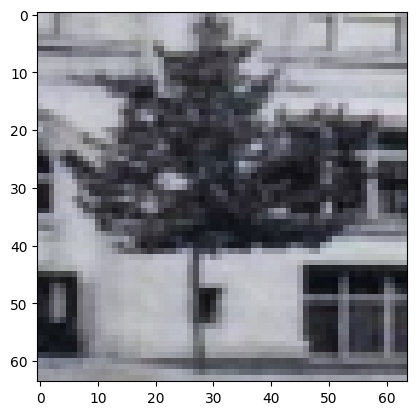

Истинный класс: Poster, Предсказанный класс: Tableware


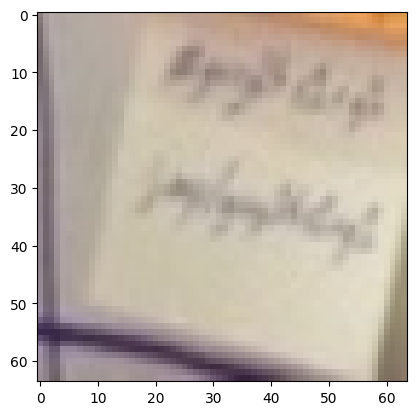

Истинный класс: Cabinetry, Предсказанный класс: Clothing


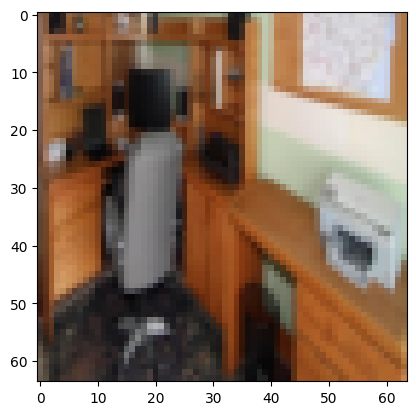

Истинный класс: Human head, Предсказанный класс: Human head


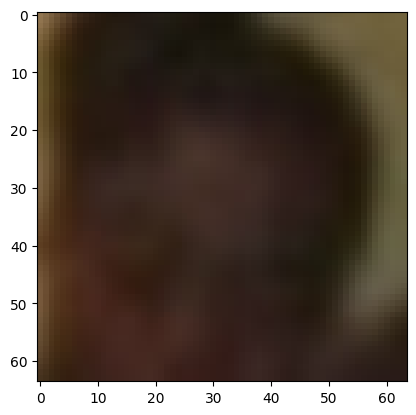

labels ---> tensor([37, 55, 87, 57])
predicted ---> tensor([62, 33, 79, 80])
total ---> 236
correct ---> 59
Истинный класс: Home appliance, Предсказанный класс: Office supplies


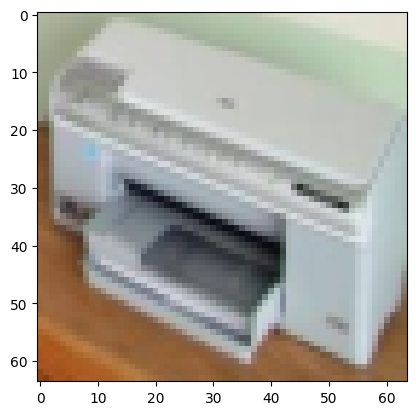

Истинный класс: Land vehicle, Предсказанный класс: Furniture


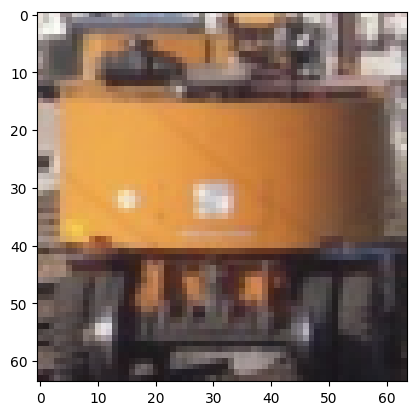

Истинный класс: Toy, Предсказанный класс: Table


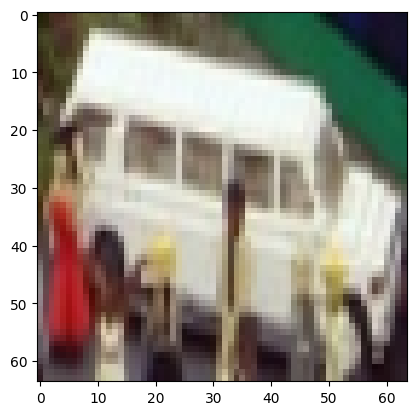

Истинный класс: Light bulb, Предсказанный класс: Tableware


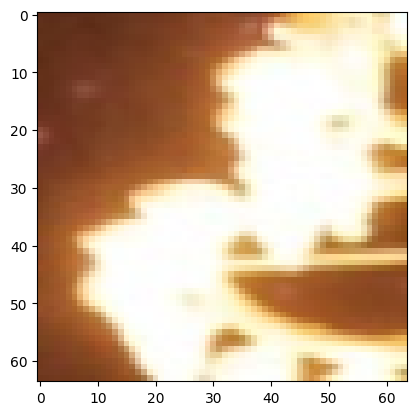

labels ---> tensor([ 6, 92, 58,  8])
predicted ---> tensor([13,  9, 13, 23])
total ---> 240
correct ---> 59
Истинный класс: Building, Предсказанный класс: Clothing


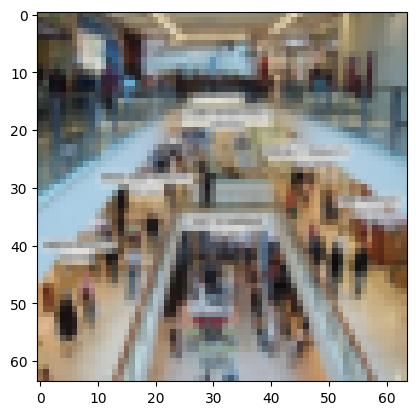

Истинный класс: Vehicle, Предсказанный класс: Car


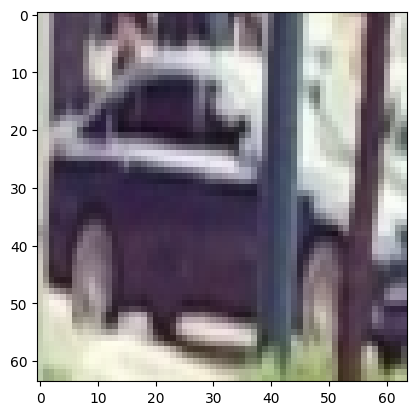

Истинный класс: Mammal, Предсказанный класс: Clothing


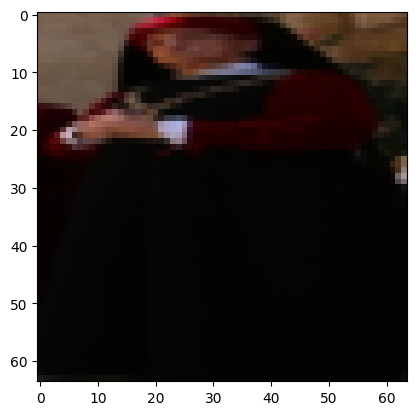

Истинный класс: Cabinetry, Предсказанный класс: Drawer


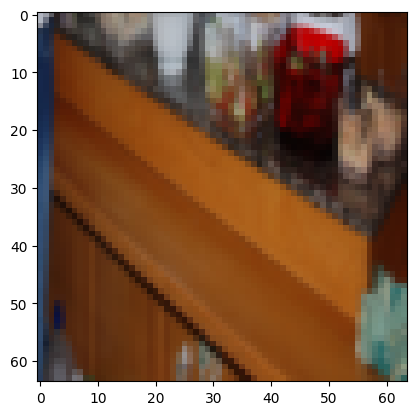

labels ---> tensor([44, 46, 13, 95])
predicted ---> tensor([91, 43, 64, 95])
total ---> 244
correct ---> 60
Истинный класс: Human hair, Предсказанный класс: Vegetable


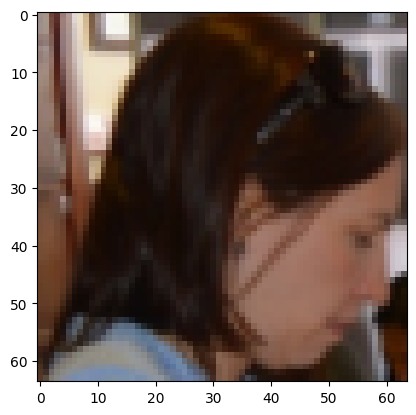

Истинный класс: Human head, Предсказанный класс: Human face


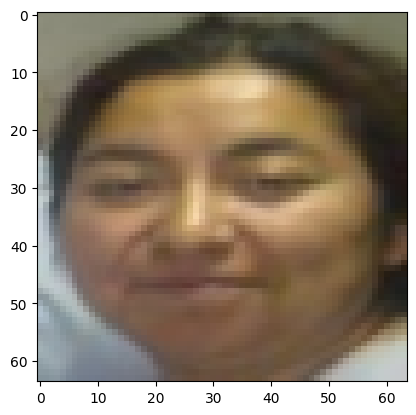

Истинный класс: Clothing, Предсказанный класс: Person


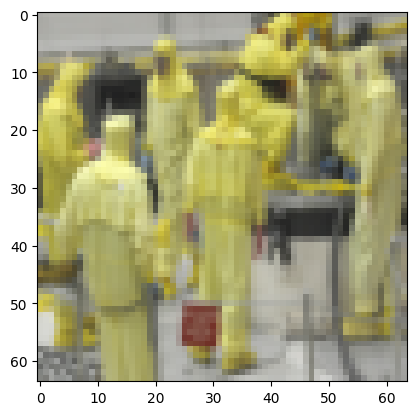

Истинный класс: Window, Предсказанный класс: Window


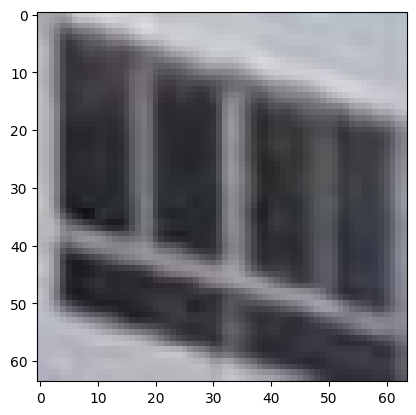

labels ---> tensor([87, 95, 97, 64])
predicted ---> tensor([80, 95, 41, 79])
total ---> 248
correct ---> 61
Истинный класс: Toy, Предсказанный класс: Tableware


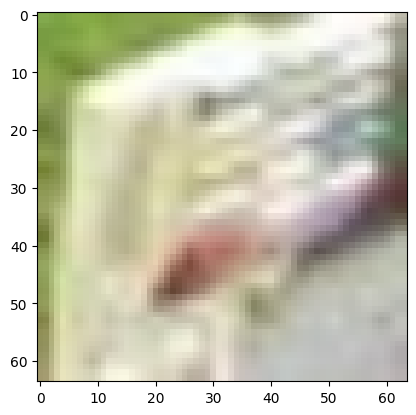

Истинный класс: Window, Предсказанный класс: Window


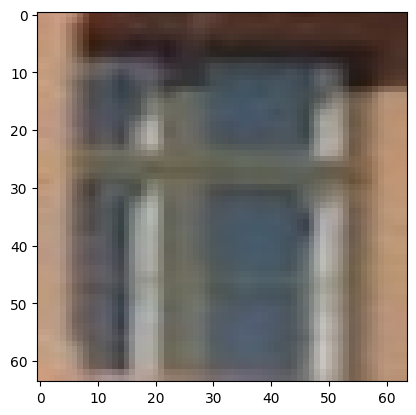

Истинный класс: Woman, Предсказанный класс: Human body


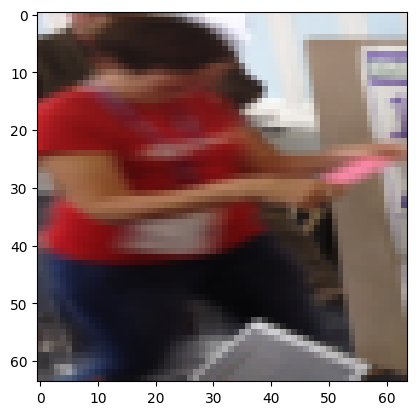

Истинный класс: Person, Предсказанный класс: Table


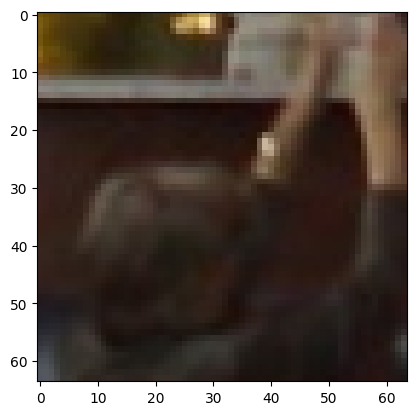

labels ---> tensor([ 6, 95, 40, 38])
predicted ---> tensor([ 6, 95, 64, 30])
total ---> 252
correct ---> 63
Истинный класс: Building, Предсказанный класс: Building


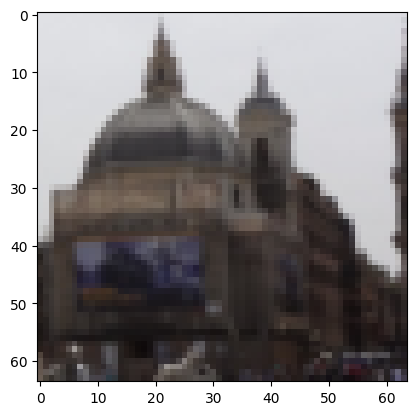

Истинный класс: Window, Предсказанный класс: Window


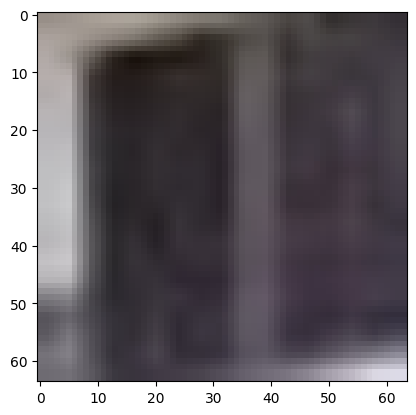

Истинный класс: Human arm, Предсказанный класс: Person


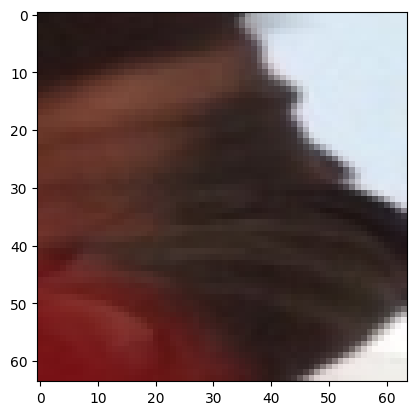

Истинный класс: House, Предсказанный класс: Food


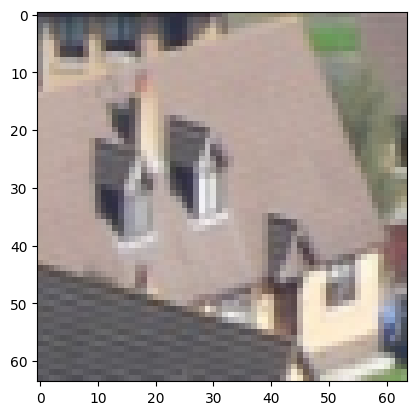

labels ---> tensor([79, 13, 46, 46])
predicted ---> tensor([43, 13, 43, 33])
total ---> 256
correct ---> 64
Истинный класс: Table, Предсказанный класс: Human face


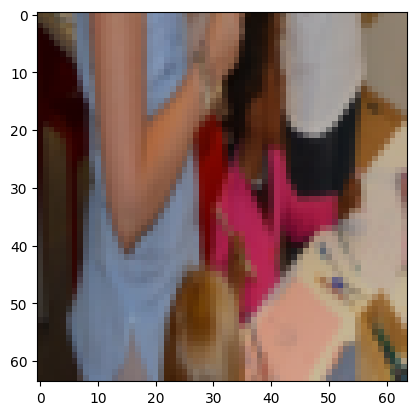

Истинный класс: Clothing, Предсказанный класс: Clothing


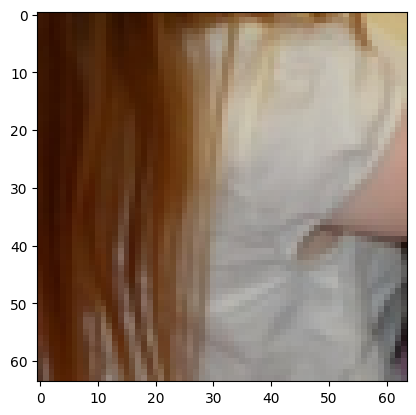

Истинный класс: Human head, Предсказанный класс: Human face


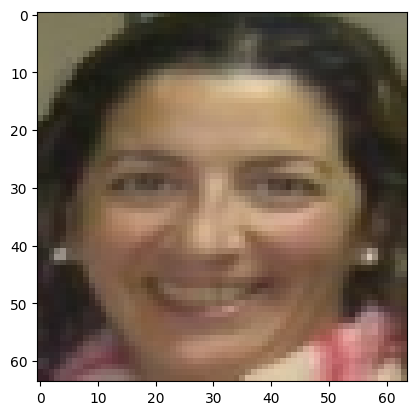

Истинный класс: Human head, Предсказанный класс: Furniture


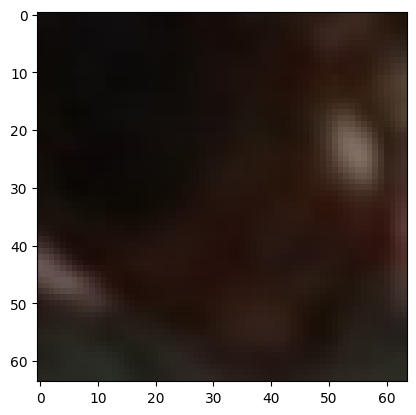

labels ---> tensor([68])
predicted ---> tensor([80])
total ---> 257
correct ---> 64
Истинный класс: Poster, Предсказанный класс: Tableware


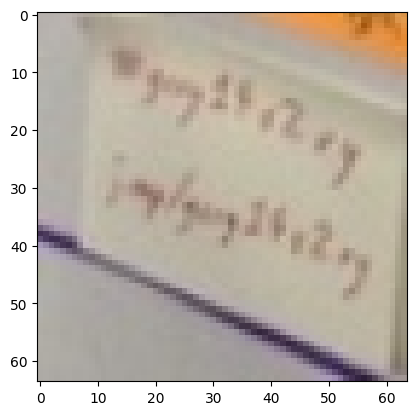

Точность на тестовых данных: 24.90%


In [19]:
# Оценка модели
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        print('images --->', images)
        print('labels --->', labels)
        _, predicted = torch.max(outputs.data, 1)
        print('predicted --->', predicted)
        total += labels.size(0)
        print('total --->', total)
        correct += (predicted == labels).sum().item()
        print('correct --->', correct)
        # Вывод изображений и предсказаний
        for i in range(len(images)):
            print(f'Истинный класс: {classes[labels[i]]}, Предсказанный класс: {classes[predicted[i]]}')
            imshow(images[i])

print(f'Точность на тестовых данных: {100 * correct / total:.2f}%')